In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import inv, det, block_diag
from scipy.optimize import brentq
from collections import namedtuple

# Lecture Notes: Two Computations to Fund Social Security

## 1. Introduction

This paper by Huang, Imrohoroglu, and Sargent addresses a critical research question: How can we design a transition from an unfunded to a funded social security system that is both economically efficient and politically feasible?

The importance of this research cannot be overstated. As many developed economies face aging populations, pay-as-you-go social security systems become increasingly unsustainable. However, any transition to a fully funded system creates substantial distributional challenges, as older generations who contributed to the unfunded system would potentially lose benefits without compensation.

A distinctive methodological aspect of this paper is its use of a linear-quadratic (LQ) framework, which allows for analytical tractability while incorporating meaningful economic complexity. By employing the risk-sensitive, linear-quadratic formulation of Hansen and Sargent (1995), the model can handle environments where social security serves as a device for insuring against risky incomes and lifetimes. This approach yields linear decision rules for individual consumption and savings, making it computationally feasible to track the distribution of consumption and wealth across cohorts. However, this computational convenience comes with limitations—particularly the assumption of quadratic preferences and Gaussian shocks, which may not fully capture the non-linearities and asymmetries present in actual economic decision-making under uncertainty.

Let's examine a general equilibrium overlapping generations model with a larger state space than previous literature. This approach extends the Auerbach and Kotlikoff (1987) methodology by incorporating:

1. Risk-sensitive preferences
2. Uncertainty about lifetimes 
3. Uninsurable labor income risk
4. A theory of consumption distribution within and across cohorts

This framework allows us to study how alternative transitions between fiscal policies and social security arrangements affect income and wealth distributions both within and across generations.

## 2. Model Settings

### 2.1 Environment and Basics

The economy consists of overlapping generations of finitely lived individuals who may live up to $T_0+1$ years and an infinitely lived government. Both individuals and the government can invest at a constant risk-free gross rate of return.

During the first $T_1+1$ periods, consumers receive labor income, which they divide between consumption, taxes, and asset accumulation. During the final $T_0-T_1$ periods (retirement), consumers receive social security benefits and consume their accumulated assets.

The government taxes income from capital and labor, issues debt, purchases goods, and pays retirement benefits.

For any variable $z$, let's use:
- Subscript $t$ to denote age
- Argument $s$ in parentheses to denote calendar time
- Superscript $s-t$ to denote date of birth

Thus: $z^{s-t}(s) \equiv z_t(s) \equiv z^{s-t}_t(s)$

### 2.2 Demographics

At date $s$, a cohort of measure $N_0(s)$ consumers is born who live during periods $s, s+1, ..., s+T_0$. As a cohort ages, its members face random survival according to age-to-age survival probabilities $\{\alpha_t\}^{T_0}_{t=0}$, where $\alpha_t$ is the probability of surviving from age $t$ to $t+1$.

Let $N_t(s)$ be the number of age $t$ people alive at time $s$ and $n$ be the constant gross rate of population growth. We have:

$$N_t(s) = \lambda_t \cdot N_0(s-t)$$

where $\lambda_t = \prod^{t-1}_{j=0} \alpha_j$ for $t = 0,...T_0$, and $\lambda_0 = 1$.

Births follow: $N_0(s) = n^s \cdot N_0(0)$

The population fraction of cohort $t$ at each time $s$ is:

$$f_t = \frac{\lambda_t \cdot n^{-t}}{\sum^{T_0}_{\tau=0} \lambda_\tau \cdot n^{-\tau}}$$

The total population at time $s$ is:

$$N(s) = N_0(0) \cdot n^s \cdot \sum^{T_0}_{t=0} n^{-t} \cdot \lambda_t$$

### 2.3 Distributions and Aggregates

Individuals face life span uncertainty and labor income shocks, which they cannot fully insure. They self-insure by accumulating risk-free assets (government bonds and physical capital) and combining these with social security benefits.

Let $\epsilon^t_0$ denote the history of random shocks an individual has received from birth to age $t$.

The state vector $x_t(s) = x_t(s; \epsilon^t_0, x_0)$ measures the stock of assets and variables a consumer uses to forecast future preferences or opportunities.

The model delivers consumption as a time- and age-dependent linear function of the state vector:

$$c_t(s; \epsilon^t_0, x_0) = \eta_{ct}(s) \cdot x_t(s; \epsilon^t_0, x_0)$$

The state vector follows a linear law of motion:

$$x_{t+1}(s+1; \epsilon^{t+1}_0, x_0) = A_t(s) \cdot x_t(s; \epsilon^t_0, x_0) + C_t(s) \cdot \epsilon_{t+1}$$

where $\epsilon_{t+1}$ is a martingale difference sequence with $E(\epsilon_{t+1}|J_t) = 0$, $E(\epsilon_{t+1} \cdot \epsilon'_{t+1}|J_t) = I$, and $J_t = (\epsilon^t_0, x_0)$.

Given rational expectations, the model delivers probability distributions for state vectors and linear functions of them. Let $\mu_t(s) = E[x_t(s)]$ and $\Sigma_t(s) = E[(x_t(s)-\mu_t(s))(x_t(s)-\mu_t(s))']$.

These moments follow:

$$\mu_{t+1}(s+1) = A_t(s) \cdot \mu_t(s)$$
$$\Sigma_{t+1}(s+1) = A_t(s) \cdot \Sigma_t(s) \cdot A_t(s)' + C_t(s) \cdot C_t(s)'$$

Per capita aggregate consumption is:

$$c(s)/N(s) = \sum^{T_0}_{t=0} \mu_{ct}(s) \cdot f_t$$

where $\mu_{ct}(s)$ is the mean consumption of age-$t$ people at time $s$.

The distribution of consumption within age cohort $t$ has mean and variance:
- $\mu_{ct}(s) = \eta_{ct}(s) \cdot \mu_t(s)$
- $\Sigma_{ct}(s) = \eta_{ct}(s) \cdot \Sigma_t(s) \cdot \eta_{ct}(s)'$

### 2.4 Resource Constraint

The economy-wide physical resource constraint is:

$$g(s) \cdot N(s) + \sum^{T_0}_{t=0} c_t(s) \cdot N^{s-t}_t + K(s) = R(s-1) \cdot K(s-1) + w(s) \cdot \sum^{T_1}_{t=0} \varepsilon_t \cdot N^{s-t}_t + N_0(s) \cdot k_{-1}(s)$$

where:
- $g(s)$ is per capita government purchases
- $K(s-1)$ is physical capital
- $R(s-1) = 1 + r(s-1) - \delta$ is the gross return on assets
- $\varepsilon_t$ is the exogenous efficiency endowment of age-$t$ people
- $w(s)$ is the base wage rate
- $N_0(s) \cdot k_{-1}(s)$ is capital brought by newborns
- $\delta$ is the depreciation rate

### 2.5 Factor Prices

Let's consider two alternative assumptions about factor prices:

1. Small open economy: $r(s-1) = r$ and $w(s) = w$ are exogenous and constant

2. Closed economy: Factor prices determined by marginal products in a Cobb-Douglas production function
  - $r(s-1) = r(K(s-1)/\tilde{N}(s)) = \tilde{A} \cdot \tilde{\alpha} \cdot (K(s-1)/\tilde{N}(s))^{\tilde{\alpha}-1}$
  - $w(s) = w(K(s-1)/\tilde{N}(s)) = (1-\tilde{\alpha}) \cdot A \cdot (K(s-1)/\tilde{N}(s))^{\tilde{\alpha}}$

where $\tilde{N}(s) = \sum^{T_1}_{t=0} \varepsilon_t \cdot N^{s-t}_t$ is aggregate labor input in efficiency units, and $\tilde{\alpha}$ is capital's share of income.

### 2.6 Household Problem

Households face a permanent income model with restricted assets. Working-age consumers ($t \leq T_1$) receive labor income $w(s) \cdot \varepsilon_t + d_t$, where $d_t$ is an AR(1) process:

$$d_t = \rho_d \cdot d_{t-1} + \xi_t$$

where $\xi_t$ is Gaussian white noise with variance $\sigma^2_d$.

The budget constraint at age $t$ and time $s$ is:

$$c_t(s) + a_t(s) = R(s-1) \cdot a_{t-1}(s-1) + w(s) \cdot \varepsilon_t + S_t(s) - T_t(s) + d_t$$

where:
- $a_{t-1}(s-1)$ is asset holdings at the beginning of age $t$
- $S_t(s)$ is social security benefits (0 while working, $S(s)$ when retired)
- $T_t(s) = \tau_0(s) + \tau_{\ell}(s)(w(s) \cdot \varepsilon_t + d_t) + \tau_a(s)(R(s-1)-1) \cdot a_{t-1}(s-1)$ are tax payments

Following Hansen and Sargent (1995), preferences over stochastic consumption processes are defined recursively:

$$U_t = [-(\pi \cdot c_t - \gamma_t)^2/2 + \beta_t \cdot R_t(U_{t+1})]$$

where:
- $R_t(U_{t+1}) = (2/\sigma) \cdot \log E[\exp(\sigma \cdot U_{t+1}/2) | J_t]$
- $\sigma$ is the risk-sensitivity parameter
- $\beta_t = \bar{\beta} \cdot \alpha_t$ is the survival-corrected discount factor

This preference specification delivers linear decision rules but allows a form of "risk-sensitivity" that induces precautionary savings. When $\sigma < 0$, the consumer prefers early resolution of uncertainty, and decision rules depend partly on noise statistics.

### 2.7 Government

The government purchases goods, pays social security benefits, taxes capital and labor income, confiscates accidental bequests, and issues one-period bonds.

The government budget constraint is:

$$\begin{align}
g(s) \cdot N(s) + \sum^{T_0}_{t=T_1+1} S_t(s) \cdot N^{s-t}_t + R(s-1) \cdot \sum^{T_0}_{t=1} b_{t-1}(s-1) \cdot N^{s-t}_t = \\
\sum^{T_0}_{t=0} N^{s-t}_t\{\tau_a(s)[R(s-1)-1] \cdot a_{t-1}(s-1) + \tau_{\ell}(s) \cdot w(s) \cdot \varepsilon_t\} + \tau_0 \cdot N(s) + \\
\sum^{T_0}_{t=0} b_t(s) \cdot N^{s-t}_t + R(s-1) \cdot \sum^{T_0}_{t=0} (1-\alpha_t) \cdot k_t(s-1) \cdot N^{s-t-1}_t
\end{align}$$

where $b_t(s)$ is government debt held by age-$t$ individuals at time $s$, and the last term represents the bequest tax.

The transition between fiscal regimes is described by a four-tuple of dates $0 \leq s_1 < s_2 < s_3$:
- Before $s = 0$: Initial stationary equilibrium
- At $s = 0$: Government announces policy change
- $s \in [s_1, s_2)$: Fiscal parameters and social security system change
- $s \geq s_2$: New constant policy parameters
- $s \geq s_3$: Final stationary equilibrium

### 2.8 Equilibrium

#### 2.8.1 Definition

An allocation is a stochastic process for $\{c_t(s), a_t(s)\}^{s_3}_{s=0}$ for $t = 0,...,T_0$, and a sequence $\{K(s)\}^{s_3}_{s=0}$.

A government policy is a sequence $\{b(s), g(s), \tau_{\ell}(s), S(s), \tau_a(s)\}^{s_3}_{s=0}$.

A price system is a sequence $\{w(s), r(s-1)\}^{s_3}_{s=0}$.

An equilibrium is an allocation, a price system, and a government policy such that:
1. Given the price sequence and government policy, the allocation solves households' optimum problems
2. The allocation and government policy satisfy the government budget constraint at each date $s$

#### 2.8.2 Stationary Equilibria

In a stationary equilibrium, all variables are independent of calendar time $s$, which simplifies the government budget constraint to:

$$g + \sum^{T_0}_{t=T_1+1} S_t \cdot f_t + [R/n - 1] \cdot \bar{b} = \tau_a(R-1) \cdot \sum^{T_0}_{t=0} a_{t-1} \cdot f_t + \tau_{\ell} \cdot \sum^{T_1}_{t=0} w \cdot \varepsilon_t \cdot f_t + \frac{R}{n} \cdot \sum^{T_0}_{t=0} (1-\alpha_t) \cdot a_t \cdot f_t$$

where $\bar{b}$ is per capita government debt in steady state.

#### 2.8.3 Transition Dynamics

Let's examine the transition dynamics in detail for both price assumptions:

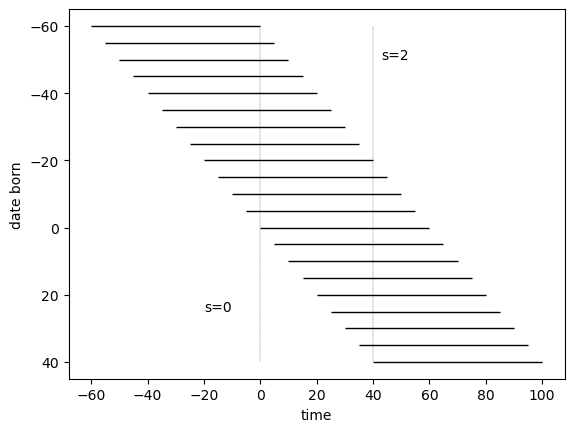

In [3]:
fig = plt.figure()

birth_range = np.arange(-60, 41, 5)
time_range = np.arange(-60, 121)

plt.hlines(birth_range, birth_range, birth_range+60, 'k', linewidth=1)
plt.vlines([0, 40], -60, 40, 'k', linestyle='--', linewidth=0.2)

plt.ylabel("date born")
plt.xlabel("time")

plt.text(-20, 25, r"s=0")
plt.text(43, -50, r"s=2")

plt.gca().invert_yaxis()
plt.show()


**Small Open Economy Transition**

In the small open economy case with fixed factor prices, the transition has a clear structure:

1. At date $s = 0$, the government announces the policy change to begin at $s_1$, which affects decision-making for all cohorts that might be alive at that time.

2. Cohorts born before $s_1 - T_0$ will have died before the policy change and are unaffected.

3. Cohorts born between $s_1 - T_0$ and $s_1$ must recalculate their consumption-saving plans for their remaining lifetimes given the announced changes.

4. Cohorts born between $s_1$ and $s_2$ face time-varying sequences of tax and benefit rates during their lives.

5. Cohorts born after $s_2$ face constant policy parameters for their entire lives.

6. The transition ends exactly at $s_3 = s_2 + T_0$ when all cohorts who experienced the policy transition have died.

Because factor prices are fixed, we can efficiently compute the transition by calculating decision rules for cohorts born at dates $s - t = s_1 - T_0 - 1, ..., s_2$. This requires fewer dynamic programs than with time-varying prices because each cohort faces a fixed pattern of rates of return, wage rates, tax rates, and benefit rates throughout life.

For any date $s$, aggregate consumption is computed by summing across all living cohorts (along a vertical line in the age-time diagram), weighted by their population fractions.

**Closed Economy Transition**

In the endogenous factor prices case, the transition dynamics are more complex:

1. The transition formally lasts indefinitely because factor prices continue to evolve even after policy parameters stabilize at $s_2$.

2. We follow Auerbach and Kotlikoff (1987) and truncate the transition at $s_3 = s_2 + 2T_0$, assuming convergence is nearly complete by this point.

3. The computation requires nested iteration procedures:
  - An inner loop determines labor income tax rates during the transition to achieve target debt levels
  - An outer loop adjusts the interest rate sequence to ensure factor markets clear

4. The transition is characterized by feedback effects:
  - Changes in capital accumulation affect interest rates and wages
  - These price changes in turn affect households' saving decisions
  - Which then further impact capital accumulation

5. The price effects propagate through time even after policy parameters have stabilized because:
  - Capital-labor ratios continue adjusting
  - Cohorts born during the transition continue making decisions based on their unique lifetime tax and benefit profiles
  - The economy converges to the new stationary equilibrium only gradually

6. Price effects complicate the welfare analysis because:
  - Lower interest rates benefit young workers (higher wages) but hurt retirees (lower returns on savings)
  - This creates additional redistributive effects beyond those intended by the policy change

This richer feedback mechanism makes the transition path in the closed economy more realistic but substantially more complex to compute.

## 3. Two Computations

Let's explore two strategies for transitioning to a fully funded social security system.

### 3.1 Compensation Through Debt

In the first experiment, the government suddenly terminates social security benefits but compensates entitled generations through a one-time increase in government debt.

Starting from an initial equilibrium with debt/GDP ratio of 0.59, social security replacement rate of 60%, and labor income tax rate of 33.9%, the key findings are:

1. "Entitlement debt" required to compensate current retirees amounts to approximately 2.7 times GDP

2. Under fixed factor prices:
  - Labor income tax rises to 36% during a 40-year transition, then drops to 8.3%
  - Capital stock rises by 66% across stationary equilibria
  - Overall efficiency gain of 1.28% of GDP

3. Under endogenous factor prices:
  - Labor income tax rises to 38% during transition, then falls to 14.2%
  - Capital stock rises by 40% across stationary equilibria
  - Rate of return on capital falls from 6.75% to 4.44%
  - Overall efficiency gain of 2.0% of GDP

### 3.2 Government Accumulation of Private Capital

In the second experiment, the government retains social security benefits but temporarily raises taxes to accumulate physical capital, the returns from which eventually finance social security payments.

Key findings:

1. Under fixed factor prices:
  - Labor income tax rises to 37.2% during transition, then falls to 13.9%
  - Capital stock rises by 65.5% across stationary equilibria
  - Government debt becomes negative (-1.18 times GDP)
  - Overall efficiency gain of 2.12% of GDP

2. Under endogenous factor prices:
  - Labor income tax rises to 39% during transition, then falls to 25%
  - Capital stock rises by 33.8% across stationary equilibria
  - Overall efficiency gain of 2.84% of GDP

### 3.3 Comparing the Two Schemes

The government-run scheme (experiment 2) delivers larger efficiency gains than privatization (experiment 1) under both price assumptions. This stems from:

1. Continued provision of insurance against life span risk
2. Partial insurance against labor income volatility through higher labor income taxes
3. Higher efficiency gains with endogenous factor prices for both experiments due to higher labor income tax rates providing implicit insurance against earnings risk

Both schemes achieve the transition to fully funded social security while maintaining welfare across generations, but through different mechanisms of intergenerational risk-sharing.

## 4. Computation Strategy


### 4.1 Dynamic Programming Problem

The household's problem can be formulated as a discounted risk-sensitive linear control problem. Let $x_t = [a_{t-1}, z_t]'$ where $z_t$ is the vector of shocks. Then:

$$U_t = x'_t \cdot P_t \cdot x_t + \xi_t$$

The recursive problem is:

$$U_t = \max_{u_t,x_{t+1}} \{u'_t \cdot Q_t \cdot u_t + x'_t \cdot R_t \cdot x_t + \frac{2 \cdot \beta_t}{\sigma} \cdot \log E_t[\exp(\sigma \cdot U_{t+1}/2)]\}$$

subject to:

$$x_{t+1} = A_t \cdot x_t + B_t \cdot u_t + C_t \cdot w_{t+1}$$

The solution is characterized by Riccati equations:

$$T_t(P) = P + \sigma \cdot P \cdot C_t(I - \sigma \cdot C'_t \cdot P \cdot C_t)^{-1} \cdot C'_t \cdot P$$
$$D_t(W) = R_t + A'_t(W - \beta^2 \cdot W \cdot B_t(Q_t + \beta \cdot B'_t \cdot W \cdot B_t)^{-1} \cdot B'_t \cdot W) \cdot A_t$$
$$S_t(k, P) = \beta_t \cdot k - \frac{\beta_t}{\sigma} \cdot \log \det(I - \sigma \cdot C'_t \cdot P \cdot C_t)$$

The optimal value function is:

$$U_t = x'_t \cdot P_t \cdot x_t + \xi_t$$

where:

$$P_t = (D_t \circ T_t) \cdot P_{t+1}$$
$$\xi_t = S_t(\xi_{t+1}, P_{t+1})$$

The optimal control is:

$$u_t = -F_t \cdot x_t$$
$$F_t = \beta[Q_t + \beta \cdot B'_t \cdot T_t(P_{t+1}) \cdot B_t]^{-1} \cdot B'_t \cdot T_t(P_{t+1}) \cdot A_t$$

### 4.2 Computing Transitions in Different Scenarios

#### Timing during the transition

A cohort born at $s$ lives during $s+0, s+1, ..., s+T_0$, and works during $s+0, s+1, ..., s+T_1$.

Let $0 \leq s_1 < s_2 < s_3$.
- At $s=0$, announces policy change between $s=s_1$ and $s=s_2$. 
- From $s=s_2$, government policies will be constant forever.
- From $s=s_3$, the convergence to final stationary equilibrium is achieved. (In small open economy, $s_3 = s_2 + T_0$.)

What cohorts are affected? Cohorts born at $s=s_1-T_0, s_1-T_0 + 1, ..., s_2$.

In all exercises, we set $T_0 = 65, T_1 = 45$ (* see note 1) and $s_1 = 0, s_2 = 40$.

#### Fixed factor price - Computation 1: Buyout
Here, $s_3 = 40 + 65 = 105$.

**Step 1**: set up parameters.

**Step 2**: solve initial stationary equilibrium, with constant social security benefit $S$. We fix all other fiscal parameters and solve for the policy $\tau_l = \tau_{l,0}$ that makes the government budget balance in the initial steady state.
```
Fix τ_a, τ_0, benef, G, Gb_bar to constants.

def F(τ_l):
    Conditions for solving a cohort's problem. 
    Produce implied government variables.
    return "government imbalance"

Find root to F(τ_l) = 0.
```

**Step 3**: solve final stationary equilibrium, with no social security. We look for government debt Gb_bar such that 

```
Fix τ_a, τ_0, benef, G to constants.

def H(Gb_bar):
    Given Gb_bar, solve for F(τ_l; Gb_bar) = 0, which yields a τ_l*. Set 
    τ_l* and compute variables implied by it.
    return debt2gdp 

Find root to H(Gb_bar) = target.
```
The associated tax on labor is $\tau_{l,2}$.


**Step 4**: solve transition path:
  - At $s=0=s_1$, the following will happen:
    - All cohorts alive will lose benefit, and cohort of age $t$ get a one-time compensation given by: 
      $$ \operatorname{comp}_t=\operatorname{ben}_t+\text {risk term}, \\ \operatorname{ben}_t=S \sum_{j=\max \left(T_1-t, 0\right)}^{T_0-t} \prod_{i=0}^j \left(R(s)\left[1-\tau_a(s)\right]+\tau_a(s)\right)$$
    - Government sets $\tau_{l,1}$ between $s_1$ and $s_2$ and sets $\tau_{l,2}$ from $s_2$ onwards.
    - Government expenditure has a one-time increase of $\sum f_t \operatorname{comp}_t$ at $s_1$.
  - We solve for $\tau_{l,1}$ such that government debt to GDP ratio in the terminal steady state equals that in the initial steady state. 

  ```
  Fix τ_a, τ_0, G to constants. benef = 0 during transition. Let Gb_bar_term be the terminal steady state Gb_bar computed above.

  def J(τ_l):
      Set τ_l, a constant, during the entire transition period.

      for cohort = 0 to T0:   # those which die at year "cohort"
        Compute comp_t

      for cohort = 0 to s3:
        Solve cohort's problem,
        compute implied variables.
      
      Compute government carryover debt to the new steady state, carryover.

      return carryover

  Find root to J(τ_l) = Gb_bar_term.
  ```
#### Fixed factor price - Computation 2
Here, $s_3 = 40 + 65 = 105$.

Now, instead of a large buyout at time 0, the government keeps the same level of social security, but moves to a regime under which the government gradually accumulates private capital, which finances social security payment. To conduct this experiment, one only needs to choose the right target terminal debt to GDP ratio which induces the government to accumulate sufficient capital.

#### Endogenous factor price 
Here, $s_3 = 40 + 2 \times 65 = 170$. Assume that after TT = T0 periods following the policy transition periods 40, the economy is close enough to the terminal steady state.

**Step 1**: set up parameters.

**Step 2**: solve initial stationary equilibrium, same as above.

**Step 3**: solve final stationary equilibrium, with no social security. Again, we look for government debt Gb_bar such that debt2gdp is the same as in the initial steady state.

**Step 4**: solve the transition path. Now the factor price sequences are endogenously determined.

```
def T(R_seq):
  # Force the last T0 periods of R_seq to be constant at new steady state levels.

  1. Compute the MPL sequence associated with the R sequence. 
  
  2. Take the price sequences as given, find root to J(τ_l) = Gb_bar_terminal, as in the above case.

  3. Compute the path of aggregate capital stock implied by the solution, compute the MPK, Rstar, and define diff = Rstar - R_seq.

  return diff

Solve T(R_seq) = 0 using a secant search algorithm with relaxation method to update R_seq_new, until convergence of interest rate.

```

## Technical details for Solving LQ Problem

The transition equation is: 

$$
\begin{align*}
c_{t}(s)+a_{t}(s)&={\color{blue}\left[R(s-1)-\tau_{t}^{a}(s)\left(R(s-1)-1\right)\right]a_{t-1}(s-1)}+{\color{orange}\left(1-\tau_{\ell}(s)\right)w(s)\varepsilon_{t}-\tau_{0}(s)+S_{t}(s)}+{\color{brown}\left(1-\tau_{\ell}(s)\right)d_{t}}\\d_{t}&=\rho_{d}d_{t-1}+\epsilon_{t}
\end{align*}
$$

Let $s$ denote the flow of time and $t$ denote the age of the cohort. This can be mapped to:

$$
\begin{align*}
\boldsymbol{x}_{t+1}&=\boldsymbol{A}_{t}\boldsymbol{x}_{t}+\boldsymbol{B}\boldsymbol{u}_{t}+\boldsymbol{C}\boldsymbol{w}_{t+1}\\\left[\begin{array}{c}
a_{t}(s)\\
1\\
d_{t+1}
\end{array}\right]&=\left[\begin{array}{ccc}
R(s-1)\left(1-\tau_{t}^{a}(s)\right)+\tau_{t}^{a}(s) & \left(1-\tau_{\ell}(s)\right)w(s)\varepsilon_{t}-\tau_{0}(s)+S_{t}\left(s\right) & \mathbf{1}_{t}^{\text{working}}\left(1-\tau_{\ell}(s)\right)\\
0 & 1 & 0\\
0 & 0 & \rho_{d}
\end{array}\right]\left[\begin{array}{c}
a_{t-1}(s-1)\\
1\\
d_{t}
\end{array}\right]+\left[\begin{array}{c}
-1\\
0\\
0
\end{array}\right]c_{t}(s)+\left[\begin{array}{c}
0\\
0\\
1
\end{array}\right]\epsilon_{t}
\end{align*}
$$

where $\mathbf{1}_{t}^{\text{working}}$ is an indicator function of whether a cohort is working.
An agent solves the following recursive problem: 

$$
\begin{align*}
U_{t}&=\max_{\boldsymbol{u}_{t}}\left[\boldsymbol{u}_{t}^{\prime}\boldsymbol{Q}\boldsymbol{u}_{t}+\boldsymbol{x}_{t}^{\prime}\boldsymbol{R}\boldsymbol{x}_{t}+2\boldsymbol{u}_{t}^{\prime}\boldsymbol{H}\boldsymbol{x}_{t}+\beta_{t}\mathcal{R}_{t}\left(U_{t+1}\right)\right]\\\text{s.t. }&\boldsymbol{x}_{t+1}=\boldsymbol{A}_{t}\boldsymbol{x}_{t}+\boldsymbol{B}\boldsymbol{u}_{t}+\boldsymbol{C}\boldsymbol{w}_{t+1}
\end{align*}
$$

where 

$$
\mathcal{R}_{t}\left(U_{t+1}\right)=(2/\sigma)\log E\left[\exp\left(\sigma U_{t+1}/2\right)\mid J_{t}\right]
$$

The $Q, R, H$ matrices are given by:

$$
\begin{align*}
&\boldsymbol{u}_{t}^{\prime}\boldsymbol{Q}\boldsymbol{u}_{t}+\boldsymbol{x}_{t}^{\prime}\boldsymbol{R}\boldsymbol{x}_{t}+2\boldsymbol{u}_{t}^{\prime}\boldsymbol{H}\boldsymbol{x}_{t}\\=&-.5\left(\pi c_{t}-\gamma\right)^{2}\\=&-.5\pi^{2}c_{t}^{2}+\pi\gamma c_{t}-.5\gamma^{2}\\=&\left[\begin{array}{ccc}
a_{t}(s) & 1 & d_{t}\end{array}\right]\left[\begin{array}{ccc}
0 & 0 & 0\\
0 & -.5\gamma^{2} & 0\\
0 & 0 & 0
\end{array}\right]\left[\begin{array}{c}
\begin{array}{c}
a_{t}(s)\\
1\\
d_{t}
\end{array}\end{array}\right]+\left(-.5\pi^{2}c_{t}^{2}\right)+2c_{t}\left[\begin{array}{ccc}
0 & .5\pi\gamma & 0\end{array}\right]\left[\begin{array}{c}
\begin{array}{c}
a_{t}(s)\\
1\\
d_{t}
\end{array}\end{array}\right]
\end{align*}
$$

Notice that we can eliminate the cross-product by taking the following transformation of it into a standard LQ problem. See: https://python.quantecon.org/cross_product_trick.html.

$$
\begin{align*}
A^{*}&=A-BQ^{-1}H\\R^{*}&=R-H^{\prime}Q^{-1}H\\F^{*}&=\left(Q+B^{\prime}PB\right)^{-1}B^{\prime}PA^{*}
\end{align*}
$$

One can then solve the optimal value function and control by applying the following iterative procedure (Hansen and Sargent, 1995 and Appendix):

$$
\begin{aligned}
&U_t=x_t^{\prime} \boldsymbol{P}_t x_t+\xi_t\\
\boldsymbol{P}_t & =\left(D_t \circ T_t\right) \boldsymbol{P}_{t+1}, \\
\xi_t & =\mathcal{S}_t\left(\xi_{t+1}, \boldsymbol{P}_{t+1}\right) .
\end{aligned}
$$

with operators defined by:

$$
\begin{gathered}
T_t(\boldsymbol{P})=\boldsymbol{P}+\sigma \boldsymbol{P} \boldsymbol{C}_t\left(I-\sigma \boldsymbol{C}_t^{\prime} \boldsymbol{P} \boldsymbol{C}_t\right)^{-1} \boldsymbol{C}_t^{\prime} \boldsymbol{P} \\
D_t(\boldsymbol{W})=\boldsymbol{R}_t+\boldsymbol{A}_t^{\prime}\left[\beta \boldsymbol{W}-\beta^2 \boldsymbol{W} \boldsymbol{B}_t\left(\boldsymbol{Q}_t+\beta \boldsymbol{B}_t^{\prime} \boldsymbol{W} \boldsymbol{B}_t\right)^{-1} \boldsymbol{B}_t^{\prime} \boldsymbol{W}\right] \boldsymbol{A}_t \\
\mathcal{S}_t(k, \boldsymbol{P})=\beta_t k-\left(\beta_t / \sigma\right) \log \operatorname{det}\left(I-\sigma \boldsymbol{C}_t^{\prime} \boldsymbol{P} \boldsymbol{C}_t\right)
\end{gathered}
$$

The optimal control is

$$
\begin{gathered}
u_t=-\boldsymbol{F}_t x_t, \\
\boldsymbol{F}_t=\beta\left[\boldsymbol{Q}_t+\beta \boldsymbol{B}_t^{\prime} T_t\left(\boldsymbol{P}_{t+1}\right) \boldsymbol{B}_t\right]^{-1} \boldsymbol{B}_t^{\prime} T_t\left(\boldsymbol{P}_{t+1}\right) \boldsymbol{A}_t .
\end{gathered}
$$

#### Mean, Variance and Covariances
Define $A_o = A - BF$. Then, 

$$ 
x_{t+1}=A_o x_t+C w_{t+1} 
$$

Unconditional means and covariances moves according to:

$$
\begin{align*}
\mu_{t+1}&=A_{o,t}\mu_{t}\\\Sigma_{t+1}&=A_{o,t}\Sigma_{t}A_{o,t}^{\prime}+CC^{\prime}
\end{align*}
$$

And the autocovariance matrices are calculated by:
$$
\Sigma_{t+j,t}=\left(\Pi_{i=0}^{j-1}A_{o,t+i}\right)\Sigma_{t}
$$

We can also build the large autocovariance matrix:

$$
V=\left[\begin{array}{ccccc}
\Sigma_{0} & A_{o,0}^{1}\Sigma_{0} &  & \cdots & \left(\Pi_{i=0}^{T-1}A_{o,i}\right)\Sigma_{0}\\
A_{o,0}^{1}\Sigma_{0} & \Sigma_{1} & A_{o,1}^{1}\Sigma_{1} & \cdots & \vdots\\
\vdots & A_{o,1}^{1}\Sigma_{1} & \Sigma_{2}\\
 & \vdots &  & \ddots & \vdots\\
\left(\Pi_{i=0}^{T-1}A_{o,i}\right)\Sigma_{0} & \cdots &  & \cdots & \Sigma_{T}
\end{array}\right]
$$



Let's start solving the numerical problem below.

## Parameter setup and initial values

#### Table 1: Preference Parameters

| Parameter | Description | Value |
|-----------|-------------|-------|
| $\{{\alpha_t}\}_{t=0}^{T_0}$ | Age-to-age survival probabilities | Faber (1982) |
| $\pi$ | Consumption preference parameter | 1.0 |
| $\sigma$ | Risk-sensitivity parameter | -0.05 |
| $\bar{\gamma}$ | Preference shock parameter | 7.0 |
| $\tilde{\beta}$ | Discount factor | 0.986 |
| $T_0$ | Maximum age | 65 |
| $T_1$ | Retirement age | 45 |
| $n$ | Gross population growth rate | 1.012 |

#### Table 2: Technology Parameters

| Parameter | Description | Value |
|-----------|-------------|-------|
| $k_{-1}$ | Initial capital endowment | 4.0 |
| $\sigma_d$ | Standard deviation of income shock | 0.85 |
| $\rho_d$ | Persistence of income shock | 0.8 |
| $\delta$ | Depreciation rate | 0.06 |
| $\{{\varepsilon_t}\}_{t=0}^{T_1}$ | Age-efficiency profile | Hansen (1991) |
| **Exogenous Factor Prices** | | |
| $w$ | Base wage rate | 5.0147 |
| $r$ | Return on capital | 0.1275 |
| **Endogenous Factor Prices** | | |
| $A$ | Production function scaling | 2.2625 |
| $\tilde{\alpha}$ | Capital share | 0.40 |

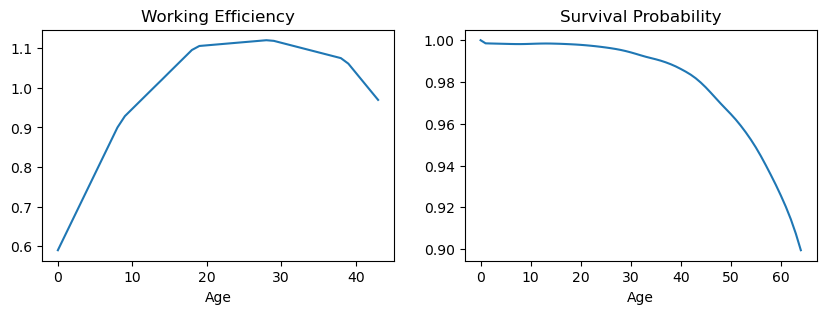

In [9]:
ε_arr, α_arr = np.load("eff.npy"), np.load("psurv.npy")

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(ε_arr)
axs[0].set_title(r"Working Efficiency")
axs[0].set_xlabel("Age")

axs[1].plot(α_arr)
axs[1].set_title(r"Survival Probability")
axs[1].set_xlabel(r"Age")

plt.show()

In [10]:
# terminal values
P_end = np.zeros((3, 3))
P_end[0, 0] = -2000000   # large penalty on holding asset in the last period

ξ_end = 0

# initial conditions
x0 = np.array([4, 1, 0])
Σ0 = np.zeros([3, 3])

In [11]:
Household = namedtuple('Household', ('α_arr', 'frac', 'n', 'π', 'σ', 'k_init', 'ε_arr',
                                     'σ_d', 'ρ_d', 'γ_bar', 'β_arr',
                                     'T0', 'T1', 'T2', 'n_x', 'n_w', 'P_end', 'ξ_end', 'x0', 'Σ0',
                                     'B', 'C', 'R', 'Q', 'H'))

def create_household(α_arr=α_arr,    # Age-to-age survival probabilities
                     n=1.012,        # Gross population growth rate
                     π=1,            # Consumption preference parameter	
                     σ=-0.05,        # Risk-sensitivity parameter
                     k_init=4,       # initial capital endowment
                     ε_arr=ε_arr,    # age-efficiency profile
                     σ_d=0.85,       # std of income shock
                     ρ_d=0.8,        # persistence of income shock
                     γ_bar=7,        # Preference shock parameter
                     β_tilde=0.986,  # Discount factor
                     T0=65,          # Maximum age
                     T1=43,          # Retirement age
                     n_x=3,          # Number of states
                     n_w=1,          # Number of shocks
                     P_end=P_end,    # Terminal value
                     ξ_end=ξ_end,    # Terminal value
                     x0=x0,          # Initial mean
                     Σ0=Σ0):         # Initial variance

    α_arr = np.concatenate([α_arr, np.array([0])])

    # length of retirement life
    T2 = T0 - T1

    # stationary population fraction
    frac = np.ones(T0+1)
    frac[1:] = np.cumprod(α_arr / n)[:-1]
    frac = frac / frac.sum()

    # expand working efficiency sequence
    ε_arr = np.concatenate([ε_arr, np.zeros(T0+1-ε_arr.size)])

    # survival-corrected discount factor
    β_arr  = β_tilde * α_arr
    β_arr[-1] = β_tilde

    # LQ matrices
    B = np.array([[-1, 0, 0]]).T
    C = np.array([[0, 0, σ_d]]).T
    R = np.array([[0, 0, 0],
                  [0, -.5 * γ_bar**2, 0],
                  [0, 0, 0]])
    Q = np.array([[-.5 * π**2]])
    H = np.array([[0, .5 * π * γ_bar, 0]])
    
    # remove cross product
    R = R - H.T @ inv(Q) @ H

    return Household(α_arr=α_arr, frac=frac, n=n, π=π, σ=σ, k_init=k_init, ε_arr=ε_arr,
                     σ_d=σ_d, ρ_d=ρ_d, γ_bar=γ_bar, β_arr=β_arr,
                     T0=T0, T1=T1, T2=T2, n_x=n_x, n_w=n_w, P_end=P_end, ξ_end=ξ_end, x0=x0, Σ0=Σ0,
                     B=B, C=C, R=R, Q=Q, H=H)

In [12]:
hh = create_household()

hh

Household(α_arr=array([1.     , 0.99851, 0.99844, 0.99838, 0.99832, 0.99826, 0.9982 ,
       0.99816, 0.99815, 0.99819, 0.99826, 0.99834, 0.9984 , 0.99843,
       0.99841, 0.99835, 0.99828, 0.99818, 0.99807, 0.99794, 0.99778,
       0.99759, 0.99737, 0.99712, 0.99684, 0.99653, 0.99619, 0.9958 ,
       0.99535, 0.99481, 0.99419, 0.9935 , 0.99278, 0.99209, 0.99148,
       0.99088, 0.99021, 0.98942, 0.98851, 0.98746, 0.98625, 0.98495,
       0.9835 , 0.98178, 0.97974, 0.97743, 0.97489, 0.97226, 0.96965,
       0.96715, 0.96466, 0.962  , 0.95907, 0.9559 , 0.95246, 0.94872,
       0.9446 , 0.94017, 0.93555, 0.93077, 0.9257 , 0.9203 , 0.91431,
       0.90742, 0.89948, 0.     ]), frac=array([0.02542014, 0.02511871, 0.02478388, 0.0244518 , 0.02412271,
       0.02379663, 0.02347354, 0.02315344, 0.0228368 , 0.02252426,
       0.02221689, 0.02191525, 0.02161944, 0.0213289 , 0.0210429 ,
       0.02076031, 0.0204803 , 0.02020264, 0.01992675, 0.01965246,
       0.01937942, 0.01910712, 0.01883505, 0.

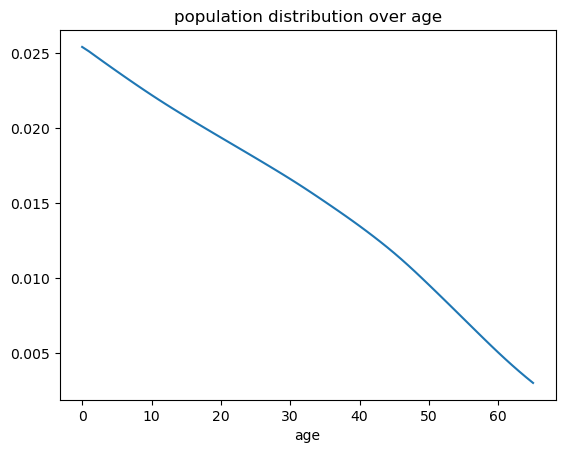

In [13]:
plt.plot(hh.frac)
plt.xlabel(r"age")
plt.title("population distribution over age")
plt.show()

In [14]:
Tech = namedtuple('Tech', ('δ', 'w', 'r', 'RR', 'A', 'α_tilde'))

def create_Tech(δ=0.06,        # depreciation rate
                w=5.0147,      # base wage rate (exogenous price)
                r=0.1275,      # return on capital (exogenous price)
                A=2.2625,      # production function scaling (endogenous price)
                α_tilde=0.40): # capital share (endogenous price)

    # gross return on capital (exogenous price)
    RR = r + 1 - δ

    return Tech(δ=δ, w=w, r=r, RR=RR, A=A, α_tilde=α_tilde)

In [15]:
tech = create_Tech()

In [16]:
def solve_riccati(t, price, policy, P_next, ξ_next, hh, tech):
    """
    Solve the Riccati equation for the LQ problem at age t.
    
    This function computes one step of the backward recursion, yielding:
    - P_t: value function matrix (V_t = x' P_t x + ξ_t)
    - F_t: optimal decision rule (c_t = -F_t @ x_t)
    - A^o_t: closed-loop transition matrix (x_{t+1} = A^o_t @ x_t + C @ ε)
    
    Parameters
    ----------
    t : int
        Current age
    price : tuple (RR, w)
        Gross return and wage rate
    policy : tuple (τ_l, τ_a, τ_0, benef)
        Labor tax, capital tax, lump-sum tax, benefit level
    P_next : ndarray
        Value function matrix at age t+1
    ξ_next : float
        Certainty equivalent adjustment at age t+1
    hh : Household
        Household parameters
    tech : Tech
        Technology parameters
    
    Returns
    -------
    F : ndarray
        Decision rule matrix (consumption = -F @ x)
    Ao : ndarray
        Closed-loop transition matrix
    P : ndarray
        Value function matrix
    ξ : float
        Certainty equivalent adjustment
    
    Notes
    -----
    The budget constraint at age t is:
        a_{t+1} = R̃_t * a_t + (1-τ_l) * w * ε_t + S_t - τ_0 - c_t
    
    where R̃_t = R - τ_a*(R-1) is the after-tax return and S_t is the
    social security benefit (positive only in retirement).
    """
    ε_arr, β_arr = hh.ε_arr, hh.β_arr
    ρ_d, σ = hh.ρ_d, hh.σ
    B, C, R, Q, H = hh.B, hh.C, hh.R, hh.Q, hh.H
    n_w = hh.n_w
    
    RR, w = price
    τ_l, τ_a, τ_0, benef = policy
    
    # Work indicator: 1 if working age, 0 if retired
    Ind_work = 0 if ε_arr[t] == 0 else 1
    
    # Construct the transition matrix A_t
    # Row 1: asset dynamics
    # Row 2: constant (trivially 1)
    # Row 3: AR(1) income shock dynamics
    A = np.array([
        [RR * (1 - τ_a) + τ_a,  # After-tax gross return on assets
         (1 - τ_l) * w * ε_arr[t] - τ_0 + benef * (ε_arr[t] == 0),  # Deterministic income
         (1 - τ_l) * Ind_work],  # Stochastic income component
        [0, 1, 0],
        [0, 0, ρ_d]
    ])
    A = A - B @ inv(Q) @ H
    β = β_arr[t]
    
    # Riccati recursion with risk-sensitivity adjustment
    PP = np.eye(n_w) - σ * (C.T @ P_next @ C)
    TP = P_next + σ * (P_next @ C @ inv(PP) @ C.T @ P_next)
    F = β * inv(Q + β * B.T @ TP @ B) @ B.T @ TP @ A
    P = R + A.T @ (β * TP - β**2 * TP @ B @ inv(Q + β * B.T @ TP @ B) @ B.T @ TP) @ A
    
    # Certainty equivalent adjustment (depends on risk sensitivity)
    if σ != 0:
        ξ = β * (ξ_next - np.log(det(PP)) / σ)
    else:
        ξ = β * (ξ_next + np.trace(C.T @ P_next @ C))
    
    # Closed-loop transition: x_{t+1} = A^o_t @ x_t + C @ ε_{t+1}
    Ao = A - B @ F
    F = F + inv(Q) @ H
    
    return F, Ao, P, ξ

In [17]:
def ss_imbalance(price, policy, hh, tech):
    """
    Calculate government budget imbalance in steady state.
    
    Given prices and policies, this function:
    1. Solves the household problem (backward recursion)
    2. Simulates the distribution of assets (forward recursion)
    3. Computes tax revenues and expenditures
    4. Returns the budget surplus/deficit
    
    Parameters
    ----------
    price : tuple (RR, w)
        Gross return and wage
    policy : tuple (τ_l, τ_a, τ_0, benef, G, Gb)
        Labor tax, capital tax, lump-sum tax, benefits, govt purchases, debt
    hh : Household
        Household parameters
    tech : Tech
        Technology parameters
    
    Returns
    -------
    diff : float
        Budget imbalance (positive = surplus, negative = deficit)
    P_arr, ξ_arr, Ao_arr, F_arr : arrays
        Value function and decision rule arrays by age
    μx_arr, μc_arr, Σx_arr, Vc_arr : arrays
        Distribution moments by age
    """
    T0, T1 = hh.T0, hh.T1
    α_arr, ε_arr, frac, n = hh.α_arr, hh.ε_arr, hh.frac, hh.n
    C = hh.C
    n_x = hh.n_x
    
    RR, w = price
    τ_l, τ_a, τ_0, benef, G, Gb = policy
    
    # Initialize containers
    μx_arr = np.empty((T0 + 2, n_x))
    μc_arr = np.empty((T0 + 1))
    Σx_arr = np.empty((T0 + 2, n_x, n_x))
    Vc_arr = np.empty((T0 + 1))
    F_arr = np.empty((T0 + 1, n_x))
    Ao_arr = np.empty((T0 + 1, n_x, n_x))
    P_arr = np.empty((T0 + 2, n_x, n_x))
    ξ_arr = np.empty((T0 + 2))
    
    # Boundary conditions
    μx_arr[0, :] = hh.x0
    Σx_arr[0, :] = hh.Σ0
    P_arr[-1] = hh.P_end
    ξ_arr[-1] = hh.ξ_end
    
    # Solve backwards (compute decision rules)
    for t in range(T0, -1, -1):
        F, Ao, P, ξ = solve_riccati(t, (RR, w), (τ_l, τ_a, τ_0, benef),
                                    P_arr[t + 1], ξ_arr[t + 1], hh, tech)
        F_arr[t] = F
        Ao_arr[t] = Ao
        P_arr[t] = P
        ξ_arr[t] = ξ
    
    # Simulate forwards (compute distributions)
    for t in range(T0 + 1):
        μx_arr[t + 1] = Ao_arr[t] @ μx_arr[t]
        μc_arr[t] = -F_arr[t] @ μx_arr[t]
        Σx_arr[t + 1] = C @ C.T + Ao_arr[t] @ Σx_arr[t] @ Ao_arr[t].T
        Vc_arr[t] = -F_arr[t] @ Σx_arr[t] @ -F_arr[t].T
    
    μa_arr = μx_arr[1:, 0]      # Mean assets at start of each age
    μa_last_arr = μx_arr[:-1, 0]  # Mean assets at end of previous age
    
    # Tax revenues
    τ_l_tot = np.sum(τ_l * ε_arr * w * frac)        # Labor income tax
    τ_a_tot = np.sum(τ_a * (RR - 1) * μa_last_arr * frac)  # Capital income tax
    τ_0_tot = np.sum(τ_0 * frac)                    # Lump-sum tax
    benef_tot = np.sum(benef * frac[T1 + 1:])       # Benefits paid to retirees
    
    # Bequest tax (accidental bequests are taxed at 100%)
    Beq = np.sum(RR * (1 - α_arr) * frac * μa_arr / n)
    
    # Government budget imbalance
    T_tot = τ_l_tot + τ_a_tot + τ_0_tot + Beq
    diff = G + benef_tot - T_tot + (RR / n - 1) * Gb
    
    return diff, P_arr, ξ_arr, Ao_arr, F_arr, μx_arr, μc_arr, Σx_arr, Vc_arr

In [18]:
SteadyState = namedtuple("SteadyState", (
    "P_arr",     # Value function matrices by age
    "ξ_arr",     # Certainty equivalent adjustments by age
    "Ao_arr",    # Closed-loop transition matrices by age
    "F_arr",     # Decision rule matrices by age
    "μx_arr",    # Mean state vectors by age
    "μc_arr",    # Mean consumption by age
    "Σx_arr",    # Covariance matrices by age
    "Vc_arr",    # Consumption variances by age
    "debt2gdp",  # Government debt to GDP ratio
    "τ_l",       # Labor income tax rate
    "benef",     # Social security benefit level
    "Gb",        # Per-capita government debt
    "k_bar",     # Per-capita capital stock
    "RR",        # Gross return on assets
    "w",         # Wage rate
    "r",         # Interest rate (before depreciation)
    "k2gdp"      # Capital to GDP ratio
))

In [19]:
def find_ss_exo(price, policy_target, hh, tech):
    """
    Find steady state with exogenous prices by solving for τ_l.
    
    Given fixed factor prices (RR, w) and target policies (τ_a, τ_0, benef, G, Gb),
    this function finds the labor income tax rate τ_l that balances the
    government budget constraint.
    
    Parameters
    ----------
    price : tuple (RR, w)
        Exogenous gross return and wage
    policy_target : tuple (τ_a, τ_0, benef, G, Gb)
        Other policy parameters
    hh : Household
        Household parameters
    tech : Tech
        Technology parameters
    
    Returns
    -------
    SteadyState : namedtuple
        Complete steady state characterization
    """
    frac, ε_arr, n, x0 = hh.frac, hh.ε_arr, hh.n, hh.x0
    RR, w = price
    r = RR - 1 + tech.δ
    
    τ_a, τ_0, benef, G, Gb = policy_target
    
    # Bisect on τ_l to find budget balance
    τl_diff = lambda τ_l: ss_imbalance((RR, w), (τ_l, τ_a, τ_0, benef, G, Gb), hh, tech)[0]
    τ_l = brentq(τl_diff, -0.5, 1 - 1e-5)
    
    diff, P_arr, ξ_arr, Ao_arr, F_arr, μx_arr, μc_arr, Σx_arr, Vc_arr = \
        ss_imbalance((RR, w), (τ_l, τ_a, τ_0, benef, G, Gb), hh, tech)
    
    μa_arr = μx_arr[1:, 0]
    
    # Compute aggregates
    ε_agg = np.sum(frac * ε_arr)
    a_agg = np.sum(frac * μa_arr)
    k_agg = a_agg - Gb
    k_share = r * (k_agg / n + frac[0] * x0[0])
    l_share = w * ε_agg
    gdp = k_share + l_share
    
    debt2gdp = Gb / gdp
    k2gdp = k_agg / gdp
    
    return SteadyState(
        P_arr=P_arr, ξ_arr=ξ_arr, Ao_arr=Ao_arr, F_arr=F_arr,
        μx_arr=μx_arr, μc_arr=μc_arr, Σx_arr=Σx_arr, Vc_arr=Vc_arr,
        debt2gdp=debt2gdp, τ_l=τ_l, benef=benef, Gb=Gb, k_bar=k_agg,
        RR=RR, w=w, r=r, k2gdp=k2gdp
    )

In [20]:
aveinc = tech.w * sum(hh.ε_arr) / (hh.T1+1)
θ = .6    # social security replacement rate

benef_0 = aveinc * θ

# policy targets in the initial economy
G_0 = 1.44
Gb_0 = 2.8 * G_0
τ_l_0 = .3385
τ_a_0 = .30
τ_0_0 = 0

# exogenous price
RR, w = tech.RR, tech.w

In [21]:
S_exo = 140     # Horizon for exogenous (fixed) price experiments
S_endo = 200    # Horizon for endogenous price experiments (S > S3 = 170)
S1, S2 = 0, 40  # Transition period: s ∈ [S1+1, S2]
S3 = S2 + 2 * hh.T0  # = 170, for endogenous price convergence

In [22]:
ss0 = find_ss_exo((RR, w), (τ_a_0, τ_0_0, benef_0, G_0, Gb_0), hh, tech)

print(f"\nInitial Steady State (s < 0):")
print(f"  Labor tax τ_l = {ss0.τ_l:.4f}")
print(f"  Interest rate r - δ = {ss0.r - tech.δ:.4f}")
print(f"  Capital/GDP = {ss0.k2gdp:.4f}")
print(f"  Debt/GDP = {ss0.debt2gdp:.4f}")


Initial Steady State (s < 0):
  Labor tax τ_l = 0.3383
  Interest rate r - δ = 0.0675
  Capital/GDP = 3.1615
  Debt/GDP = 0.5899


In [23]:
Gb_arr = np.linspace(0.5 * Gb_0, 1.5 * Gb_0, 20)
τl_arr = np.empty_like(Gb_arr)
debt2gdp_arr = np.empty_like(Gb_arr)

for i, Gb in enumerate(Gb_arr):
    
    ss = find_ss_exo((RR, w), (τ_a_0, τ_0_0, 0, G_0, Gb), hh, tech)
    τl_arr[i] = ss.τ_l
    debt2gdp_arr[i] = ss.debt2gdp

Text(0, 0.5, 'debt2gdp')

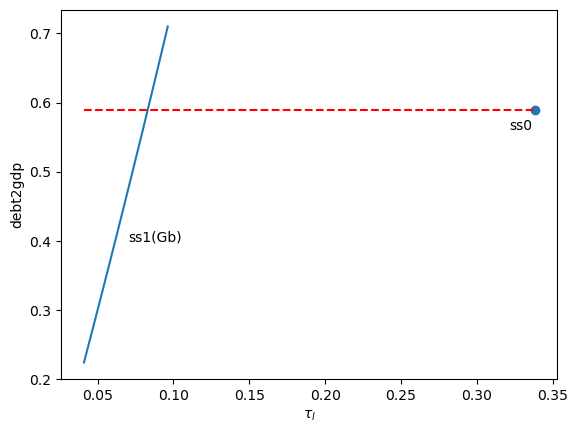

In [24]:
plt.plot(τl_arr, debt2gdp_arr)
plt.hlines(ss0.debt2gdp, τl_arr.min(), np.maximum(τl_arr.max(), ss0.τ_l), linestyle='--', color='r')

plt.scatter(ss0.τ_l, ss0.debt2gdp)
plt.text(ss0.τ_l*0.95, ss0.debt2gdp*0.95, "ss0")
plt.text(0.07, 0.4, "ss1(Gb)")

plt.xlabel('$τ_l$')
plt.ylabel('debt2gdp')

In [25]:
def ss_target_debt2gdp_exo(debt2gdp_target, policy_target, price, hh, tech):
    """
    Find steady state with target debt-to-GDP ratio (exogenous prices).
    
    This function finds the level of government debt Gb such that the
    resulting steady state has the specified debt-to-GDP ratio.
    
    Parameters
    ----------
    debt2gdp_target : float
        Target debt-to-GDP ratio (can be negative for creditor government)
    policy_target : tuple (τ_a, τ_0, benef, G)
        Policy parameters (excluding Gb which is solved for)
    price : tuple (RR, w)
        Exogenous factor prices
    hh : Household
        Household parameters
    tech : Tech
        Technology parameters
    
    Returns
    -------
    SteadyState : namedtuple
        Steady state with specified debt-to-GDP ratio
    """
    τ_a, τ_0, benef, G = policy_target
    RR, w = price
    
    debt2gdp_diff = lambda Gb: find_ss_exo((RR, w), (τ_a, τ_0, benef, G, Gb), hh, tech).debt2gdp - debt2gdp_target
    Gb = brentq(debt2gdp_diff, -40, 20)
    
    return find_ss_exo((RR, w), (τ_a, τ_0, benef, G, Gb), hh, tech)

In [26]:
ss1 = ss_target_debt2gdp_exo(ss0.debt2gdp, (τ_a_0, τ_0_0, 0, G_0), (RR, w), hh, tech)

print(f"\nTerminal Steady State (s ≥ s₃):")
print(f"  Labor tax τ_l = {ss1.τ_l:.4f}")
print(f"  Benefits θ = 0")
print(f"  Capital/GDP = {ss1.k2gdp:.4f}")
print(f"  Debt/GDP = {ss1.debt2gdp:.4f}")


Terminal Steady State (s ≥ s₃):
  Labor tax τ_l = 0.0831
  Benefits θ = 0
  Capital/GDP = 4.1567
  Debt/GDP = 0.5899


In [27]:
def solve_backwards(price_seq, policy_seq, P_arr_ss1, ξ_arr_ss1, hh, tech, S):
    """
    Solve household problems backwards during transition.
    
    Starting from the terminal steady state value functions, this computes
    decision rules F_seq[s,t] for each calendar time s and age t.
    
    Parameters
    ----------
    price_seq : ndarray, shape (S+2, 2)
        Price sequence [RR, w] at each date
    policy_seq : ndarray, shape (S+2, 6)
        Policy sequence [τ_l, τ_a, τ_0, benef, G, Gb] at each date
    P_arr_ss1, ξ_arr_ss1 : arrays
        Terminal steady state value functions
    hh : Household
        Household parameters
    tech : Tech
        Technology parameters
    S : int
        Transition horizon
    
    Returns
    -------
    F_seq, Ao_seq, P_seq, ξ_seq : arrays
        Decision rules and value functions indexed by (s, t)
    """
    T0 = hh.T0
    n_x = hh.n_x
    
    F_seq = np.empty((S + 1, T0 + 1, n_x))
    Ao_seq = np.empty((S + 1, T0 + 1, n_x, n_x))
    P_seq = np.empty((S + 2, T0 + 2, n_x, n_x))
    ξ_seq = np.empty((S + 2, T0 + 2))
    
    # Terminal conditions
    P_seq[:, -1] = hh.P_end     # All ages: terminal value at death
    ξ_seq[:, -1] = hh.ξ_end
    P_seq[-1, :] = P_arr_ss1    # Terminal SS: all dates after S+1
    ξ_seq[-1, :] = ξ_arr_ss1
    
    # Backward recursion over (s, t)
    for s in range(S, -1, -1):
        for t in range(T0, -1, -1):
            RR_s, w_s = price_seq[s]
            τ_l, τ_a, τ_0, benef, G, Gb = policy_seq[s]
            F, Ao, P, ξ = solve_riccati(t, (RR_s, w_s), (τ_l, τ_a, τ_0, benef),
                                        P_seq[s + 1, t + 1], ξ_seq[s + 1, t + 1], hh, tech)
            F_seq[s, t] = F
            Ao_seq[s, t] = Ao
            P_seq[s, t] = P
            ξ_seq[s, t] = ξ
    
    return F_seq, Ao_seq, P_seq, ξ_seq

In [28]:
def simulate_forwards(Ao_seq, F_seq, μx_init, Σx_init, hh, S):
    """
    Simulate forward during transition.
    
    Given initial distributions at s=0 and decision rules, this computes
    the evolution of state means and covariances over the transition.
    
    Parameters
    ----------
    Ao_seq, F_seq : arrays
        Decision rules from backward solve
    μx_init, Σx_init : arrays
        Initial state distributions by age (from initial SS or compensated)
    hh : Household
        Household parameters
    S : int
        Transition horizon
    
    Returns
    -------
    μx_seq, μc_seq, Σx_seq, Vc_seq : arrays
        Evolution of means and covariances over (s, t)
    """
    T0 = hh.T0
    C = hh.C
    x0, Σ0, n_x = hh.x0, hh.Σ0, hh.n_x
    
    μx_seq = np.empty((S + 2, T0 + 2, n_x))
    μc_seq = np.empty((S + 1, T0 + 1))
    Σx_seq = np.empty((S + 2, T0 + 2, n_x, n_x))
    Vc_seq = np.empty((S + 1, T0 + 1))
    
    # Newborns at all dates have same initial conditions
    μx_seq[:, 0] = x0
    Σx_seq[:, 0] = Σ0
    
    # Initial date: use initial SS distributions (possibly with compensation)
    μx_seq[0, :] = μx_init
    Σx_seq[0, :] = Σx_init
    
    # Forward recursion
    for s in range(S + 1):
        for t in range(T0 + 1):
            μx_seq[s + 1, t + 1] = Ao_seq[s, t] @ μx_seq[s, t]
            μc_seq[s, t] = -F_seq[s, t] @ μx_seq[s, t]
            Σx_seq[s + 1, t + 1] = C @ C.T + Ao_seq[s, t] @ Σx_seq[s, t] @ Ao_seq[s, t].T
            Vc_seq[s, t] = -F_seq[s, t] @ Σx_seq[s, t] @ -F_seq[s, t].T
    
    return μx_seq, μc_seq, Σx_seq, Vc_seq

In [29]:
def transition_paths(τ_l_trans, price_seq, policy_seq, ss0, ss1, hh, tech, S, S1, S2,
                     μx_init=None, Σx_init=None):
    """
    Compute transition path for given tax rate and price/policy sequences.
    
    This is the core workhorse called by all transition solvers. It:
    1. Overwrites τ_l in [S1+1, S2] with τ_l_trans
    2. Solves household problems backwards from terminal SS
    3. Simulates forwards from initial conditions
    4. Computes capital and government debt paths
    
    Parameters
    ----------
    τ_l_trans : float
        Labor income tax rate during the transition period [S1+1, S2].
    price_seq : ndarray, shape (S+2, 2)
        Columns: [RR, w] at each date.
    policy_seq : ndarray, shape (S+2, 6)
        Columns: [τ_l, τ_a, τ_0, benef, G, Gb].
    ss0, ss1 : SteadyState
        Initial and terminal steady states.
    μx_init, Σx_init : ndarray or None
        If None, uses ss0 distributions. Override with compensated
        initial conditions for the buyout experiment.
    
    Returns
    -------
    carryover : float
        Gb(S) - ss1.Gb. Zero when τ_l_trans is correctly calibrated.
    μx_seq, μc_seq, k_seq, Gb_seq, F_seq, Ao_seq
    """
    T0 = hh.T0
    
    # Update policy sequence with transition tax
    policy_seq = policy_seq.copy()
    policy_seq[S1 + 1:S2 + 1, 0] = τ_l_trans
    
    # Solve backwards
    F_seq, Ao_seq, P_seq, ξ_seq = solve_backwards(
        price_seq, policy_seq, ss1.P_arr, ss1.ξ_arr, hh, tech, S
    )
    
    # Set initial conditions
    if μx_init is None:
        μx_init = ss0.μx_arr
    if Σx_init is None:
        Σx_init = ss0.Σx_arr
    
    # Simulate forwards
    μx_seq, μc_seq, Σx_seq, Vc_seq = simulate_forwards(
        Ao_seq, F_seq, μx_init, Σx_init, hh, S
    )
    
    # Compute capital path from resource constraint
    k_seq = np.empty(S + 1)
    ε_agg = np.sum(hh.ε_arr * hh.frac)
    k_seq[0] = ss0.k_bar
    
    for s in range(1, S + 1):
        RR = price_seq[s, 0]
        w = price_seq[s, 1]
        G = policy_seq[s, 4]
        k_seq[s] = (RR * (hh.frac[0] * hh.x0[0] + k_seq[s - 1] / hh.n) - G
                    - np.sum(μc_seq[s] * hh.frac) + w * ε_agg)
    
    # Compute debt path: Gb = total assets - capital
    a_seq = (μx_seq[1:, 1:, 0] * hh.frac).sum(1)
    Gb_seq = a_seq - k_seq
    
    carryover = Gb_seq[-1] - ss1.Gb
    
    return carryover, μx_seq, μc_seq, k_seq, Gb_seq, F_seq, Ao_seq

In [30]:
# Construct price and policy sequences
price_seq = np.column_stack([np.full(S_exo + 2, RR), np.full(S_exo + 2, w)])

policy_seq_base = np.empty((S_exo + 2, 6))
policy_seq_base[:S1 + 1, 0] = ss0.τ_l
policy_seq_base[S2 + 1:, 0] = ss1.τ_l
policy_seq_base[:, 1] = τ_a_0
policy_seq_base[:, 2] = τ_0_0
policy_seq_base[:, 3] = 0  # Benefits = 0 for Experiment 1
policy_seq_base[:, 4] = G_0
policy_seq_base[:, 5] = Gb_0

In [31]:
# Test two candidate tax rates to illustrate shooting
τ_l_low = 0.14
τ_l_high = 0.17

_, μx_seq1, μc_seq1, k_seq1, Gb_seq1, _, _ = transition_paths(
    τ_l_low, price_seq, policy_seq_base, ss0, ss1, hh, tech, S_exo, S1, S2
)
_, μx_seq2, μc_seq2, k_seq2, Gb_seq2, _, _ = transition_paths(
    τ_l_high, price_seq, policy_seq_base, ss0, ss1, hh, tech, S_exo, S1, S2
)

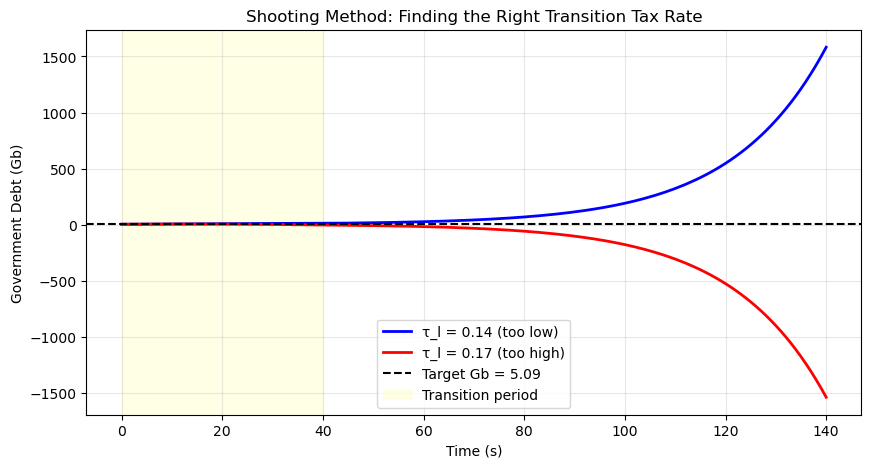

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Gb_seq1, 'b-', linewidth=2, label=f'τ_l = {τ_l_low:.2f} (too low)')
ax.plot(Gb_seq2, 'r-', linewidth=2, label=f'τ_l = {τ_l_high:.2f} (too high)')
ax.axhline(ss1.Gb, color='k', linestyle='--', label=f'Target Gb = {ss1.Gb:.2f}')
ax.axvspan(S1, S2, alpha=0.1, color='yellow', label='Transition period')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Government Debt (Gb)')
ax.set_title('Shooting Method: Finding the Right Transition Tax Rate')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

In [33]:
def find_transition_exo(price_seq, policy_seq_base, ss0, ss1,
                        hh, tech, S, S1, S2,
                        compensation=None,
                        τl_bounds=(0.01, 0.6)):
    """
    Find transition tax rate under exogenous (fixed) factor prices.
    
    Uses Brent's method to bisect on τ_l_trans until terminal government
    debt matches the target in ss1.
    
    Parameters
    ----------
    compensation : callable or None
        If None: no compensation, uses ss0 initial conditions.
        If callable: compensation(τ_l_trans, policy_seq_base, price_seq)
            -> (μx_init, Σx_init) with compensated distributions.
    τl_bounds : tuple
        Bracket for bisection on τ_l_trans.
    
    Returns
    -------
    τ_l_trans : float
        Transition labor income tax rate that balances terminal debt.
    results : tuple
        Full output from transition_paths at the solution.
    """
    def shooting_dist(τ_l_trans):
        μx_init = Σx_init = None
        if compensation is not None:
            μx_init, Σx_init = compensation(τ_l_trans, policy_seq_base, price_seq)
        return transition_paths(
            τ_l_trans, price_seq, policy_seq_base,
            ss0, ss1, hh, tech, S, S1, S2,
            μx_init, Σx_init
        )[0]
    
    τ_l_trans = brentq(shooting_dist, *τl_bounds)
    
    # Recover full results at the solution
    μx_init = Σx_init = None
    if compensation is not None:
        μx_init, Σx_init = compensation(τ_l_trans, policy_seq_base, price_seq)
    results = transition_paths(
        τ_l_trans, price_seq, policy_seq_base,
        ss0, ss1, hh, tech, S, S1, S2,
        μx_init, Σx_init
    )
    
    return τ_l_trans, results

In [34]:
# Find the correct transition tax rate
τ_l_trans, results = find_transition_exo(
    price_seq, policy_seq_base, ss0, ss1, hh, tech, S_exo, S1, S2
)

carryover, μx_seq, μc_seq, k_seq, Gb_seq, F_seq, Ao_seq = results

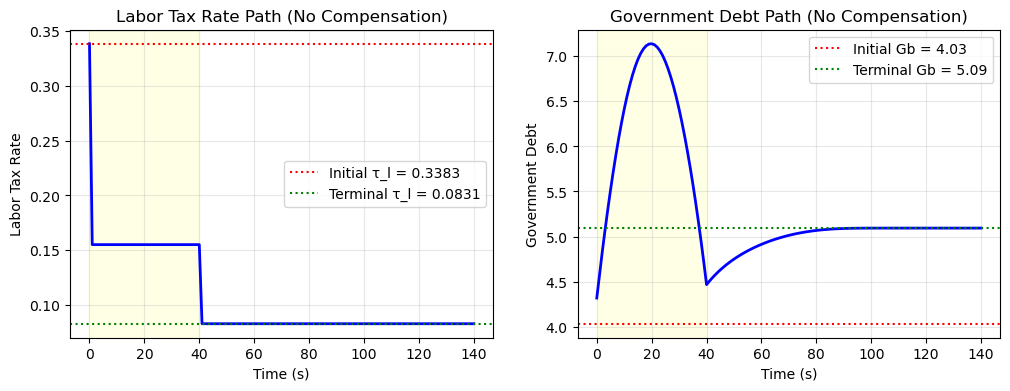

In [35]:
# Construct τ_l sequence
τ_l_seq = np.zeros(S_exo + 1)
τ_l_seq[:S1 + 1] = ss0.τ_l
τ_l_seq[S1 + 1:S2 + 1] = τ_l_trans
τ_l_seq[S2 + 1:] = ss1.τ_l

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(τ_l_seq, 'b-', linewidth=2)
axes[0].axhline(ss0.τ_l, color='r', linestyle=':', label=f'Initial τ_l = {ss0.τ_l:.4f}')
axes[0].axhline(ss1.τ_l, color='g', linestyle=':', label=f'Terminal τ_l = {ss1.τ_l:.4f}')
axes[0].axvspan(S1, S2, alpha=0.1, color='yellow')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Labor Tax Rate')
axes[0].set_title('Labor Tax Rate Path (No Compensation)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(Gb_seq, 'b-', linewidth=2)
axes[1].axhline(ss0.Gb, color='r', linestyle=':', label=f'Initial Gb = {ss0.Gb:.2f}')
axes[1].axhline(ss1.Gb, color='g', linestyle=':', label=f'Terminal Gb = {ss1.Gb:.2f}')
axes[1].axvspan(S1, S2, alpha=0.1, color='yellow')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Government Debt')
axes[1].set_title('Government Debt Path (No Compensation)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

## Buy-out

### fixed price

In [38]:
def compute_compensation(death_time, τ_l_seq, τ_a_seq, benef_diff, RR_seq, w_seq, hh, ss0_τ_l):
    """
    Compute compensation for a cohort dying at death_time.
    
    Compensation = present discounted value of:
    1. Lost benefits (for retirees): benef_diff
    2. Change in after-tax labor income: w(s) * ε * (τ_l(s) - τ_l_0)
    
    Parameters
    ----------
    death_time : int
        Calendar time at which this cohort dies (= remaining lifespan at s=0)
    τ_l_seq, τ_a_seq : ndarray
        Tax sequences
    benef_diff : ndarray
        Benefit difference (old - new) by age
    RR_seq : ndarray
        Gross return sequence
    w_seq : ndarray
        Wage sequence (time-varying under endogenous prices)
    hh : Household
        Household parameters
    ss0_τ_l : float
        Initial steady state labor tax rate
    
    Returns
    -------
    float
        Compensation amount (PDV of losses)
    """
    T0 = hh.T0
    
    if death_time >= T0 or death_time < 0:
        return 0.0
    
    n_periods = death_time + 1
    age_at_0 = T0 - death_time
    
    τ_l_cohort = τ_l_seq[:n_periods]
    τ_a_cohort = τ_a_seq[:n_periods]
    RR_cohort = RR_seq[:n_periods]
    w_cohort = w_seq[:n_periods]
    
    ε_seq = hh.ε_arr[age_at_0:T0 + 1]
    benef_seq = benef_diff[age_at_0:T0 + 1].copy()
    benef_seq[ε_seq != 0] = 0  # Only retirees receive benefits
    
    # After-tax return for discounting
    RR_tilde_seq = RR_cohort - τ_a_cohort * (RR_cohort - 1)
    discount_factors = np.cumprod(RR_tilde_seq)
    
    # Labor income loss from higher taxes
    labor_loss = w_cohort * ε_seq * (τ_l_cohort - ss0_τ_l)
    
    pv_seq = (benef_seq + labor_loss) / discount_factors
    return np.sum(pv_seq)


def apply_compensation(μx_arr_ss0, Σx_arr_ss0, τ_l_seq, τ_a_seq, benef_diff,
                       RR_seq, w_seq, hh, ss0_τ_l):
    """
    Apply compensation to initial conditions for all existing cohorts.
    
    Adds the computed compensation amount to the asset holdings of each
    cohort alive at time s=0.
    
    Parameters
    ----------
    μx_arr_ss0, Σx_arr_ss0 : arrays
        Initial steady state distributions
    τ_l_seq, τ_a_seq : ndarray
        Tax sequences
    benef_diff : ndarray
        Benefit difference by age
    RR_seq, w_seq : ndarray
        Price sequences
    hh : Household
        Household parameters
    ss0_τ_l : float
        Initial steady state labor tax rate
    
    Returns
    -------
    μx_init, Σx_init : arrays
        Compensated initial conditions
    """
    T0 = hh.T0
    n_x = hh.n_x
    
    μx_init = np.empty((T0 + 2, n_x))
    Σx_init = np.empty((T0 + 2, n_x, n_x))
    
    μx_init[0] = hh.x0
    Σx_init[0] = hh.Σ0
    
    for age in range(1, T0 + 2):
        if age <= T0:
            μx_init[age] = μx_arr_ss0[age].copy()
            Σx_init[age] = Σx_arr_ss0[age].copy()
            
            death_time = T0 - age
            if death_time >= 0:
                comp = compute_compensation(death_time, τ_l_seq, τ_a_seq, benef_diff,
                                          RR_seq, w_seq, hh, ss0_τ_l)
                μx_init[age, 0] += comp  # Add compensation to assets
        else:
            μx_init[age] = hh.x0
            Σx_init[age] = hh.Σ0
    
    return μx_init, Σx_init

In [39]:
# Benefit difference (for compensation calculation)
benef_diff_exp1 = np.zeros(hh.T0 + 1)
benef_diff_exp1[hh.T1 + 1:] = ss0.benef  # Full benefit lost

In [40]:
RR_exo, w_exo = tech.RR, tech.w

ss1_exp1_exo = ss_target_debt2gdp_exo(
    ss0.debt2gdp, (τ_a_0, τ_0_0, 0, G_0), (RR_exo, w_exo), hh, tech
)

In [41]:
# Price and policy sequences (fixed prices)
price_seq_exp1_exo = np.column_stack([
    np.full(S_exo + 2, RR_exo), 
    np.full(S_exo + 2, w_exo)
])

policy_seq_exp1_exo = np.empty((S_exo + 2, 6))
policy_seq_exp1_exo[:S1 + 1, 0] = ss0.τ_l
policy_seq_exp1_exo[S2 + 1:, 0] = ss1_exp1_exo.τ_l
policy_seq_exp1_exo[:, 1] = τ_a_0
policy_seq_exp1_exo[:, 2] = τ_0_0
policy_seq_exp1_exo[:, 3] = 0  # No benefits after reform
policy_seq_exp1_exo[:, 4] = G_0
policy_seq_exp1_exo[:, 5] = Gb_0

In [42]:
# Define buyout compensation callback
def buyout_compensation_exp1_exo(τ_l_trans, policy_seq_base, price_seq):
    policy_seq = policy_seq_base.copy()
    policy_seq[S1 + 1:S2 + 1, 0] = τ_l_trans
    return apply_compensation(
        ss0.μx_arr, ss0.Σx_arr,
        policy_seq[:, 0], policy_seq[:, 1], benef_diff_exp1,
        price_seq[:, 0], price_seq[:, 1], hh, ss0.τ_l
    )

# Solve with buyout
τ_l_exp1_exo_bo, results_exp1_exo_bo = find_transition_exo(
    price_seq_exp1_exo, policy_seq_exp1_exo, ss0, ss1_exp1_exo,
    hh, tech, S_exo, S1, S2,
    compensation=buyout_compensation_exp1_exo
)

# Solve without buyout (for comparison)
τ_l_exp1_exo_nb, results_exp1_exo_nb = find_transition_exo(
    price_seq_exp1_exo, policy_seq_exp1_exo, ss0, ss1_exp1_exo,
    hh, tech, S_exo, S1, S2
)

In [43]:
# Store for later use
exp1_exo = {
    'ss0': ss0, 'ss1': ss1_exp1_exo,
    'τ_l_buyout': τ_l_exp1_exo_bo, 'τ_l_no_buyout': τ_l_exp1_exo_nb,
    'results_buyout': results_exp1_exo_bo, 'results_no_buyout': results_exp1_exo_nb,
    'hh': hh, 'tech': tech
}

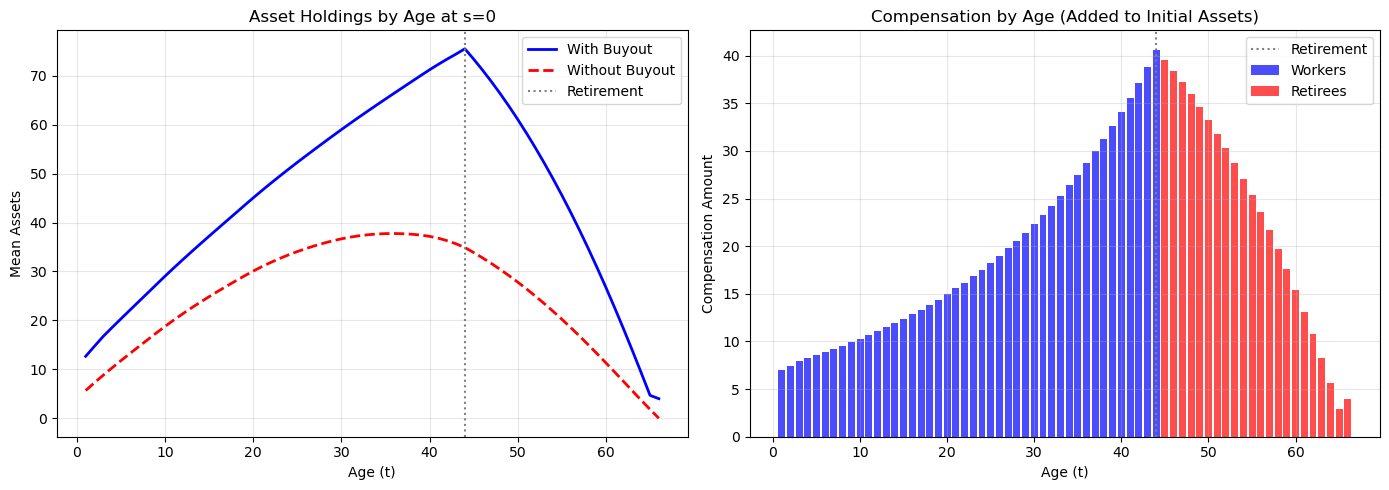

In [44]:
# Extract results
_, μx_seq_bo, μc_seq_bo, k_seq_bo, Gb_seq_bo, _, _ = exp1_exo['results_buyout']
_, μx_seq_nb, μc_seq_nb, k_seq_nb, Gb_seq_nb, _, _ = exp1_exo['results_no_buyout']

# Mean assets by age at time s=0 (with vs without buyout)
μa_bo = μx_seq_bo[0, 1:, 0]  # Assets at s=0 with buyout
μa_nb = μx_seq_nb[0, 1:, 0]  # Assets at s=0 without buyout

# Compensation = difference in initial assets
compensation_by_age = μa_bo - μa_nb

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Asset profiles
ages = np.arange(1, hh.T0 + 2)
axes[0].plot(ages, μa_bo, 'b-', linewidth=2, label='With Buyout')
axes[0].plot(ages, μa_nb, 'r--', linewidth=2, label='Without Buyout')
axes[0].axvline(hh.T1 + 1, color='gray', linestyle=':', label='Retirement')
axes[0].set_xlabel('Age (t)')
axes[0].set_ylabel('Mean Assets')
axes[0].set_title('Asset Holdings by Age at s=0')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Compensation histogram
working_ages = ages[ages <= hh.T1 + 1]
retired_ages = ages[ages > hh.T1 + 1]
comp_working = compensation_by_age[:hh.T1 + 1]
comp_retired = compensation_by_age[hh.T1 + 1:]

axes[1].bar(working_ages, comp_working, color='blue', alpha=0.7, label='Workers')
axes[1].bar(retired_ages, comp_retired, color='red', alpha=0.7, label='Retirees')
axes[1].axhline(0, color='k', linewidth=0.5)
axes[1].axvline(hh.T1 + 1, color='gray', linestyle=':', label='Retirement')
axes[1].set_xlabel('Age (t)')
axes[1].set_ylabel('Compensation Amount')
axes[1].set_title('Compensation by Age (Added to Initial Assets)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

Text(0.5, 1.02, 'Experiment 1: Effect of Compensation on Transition Paths')

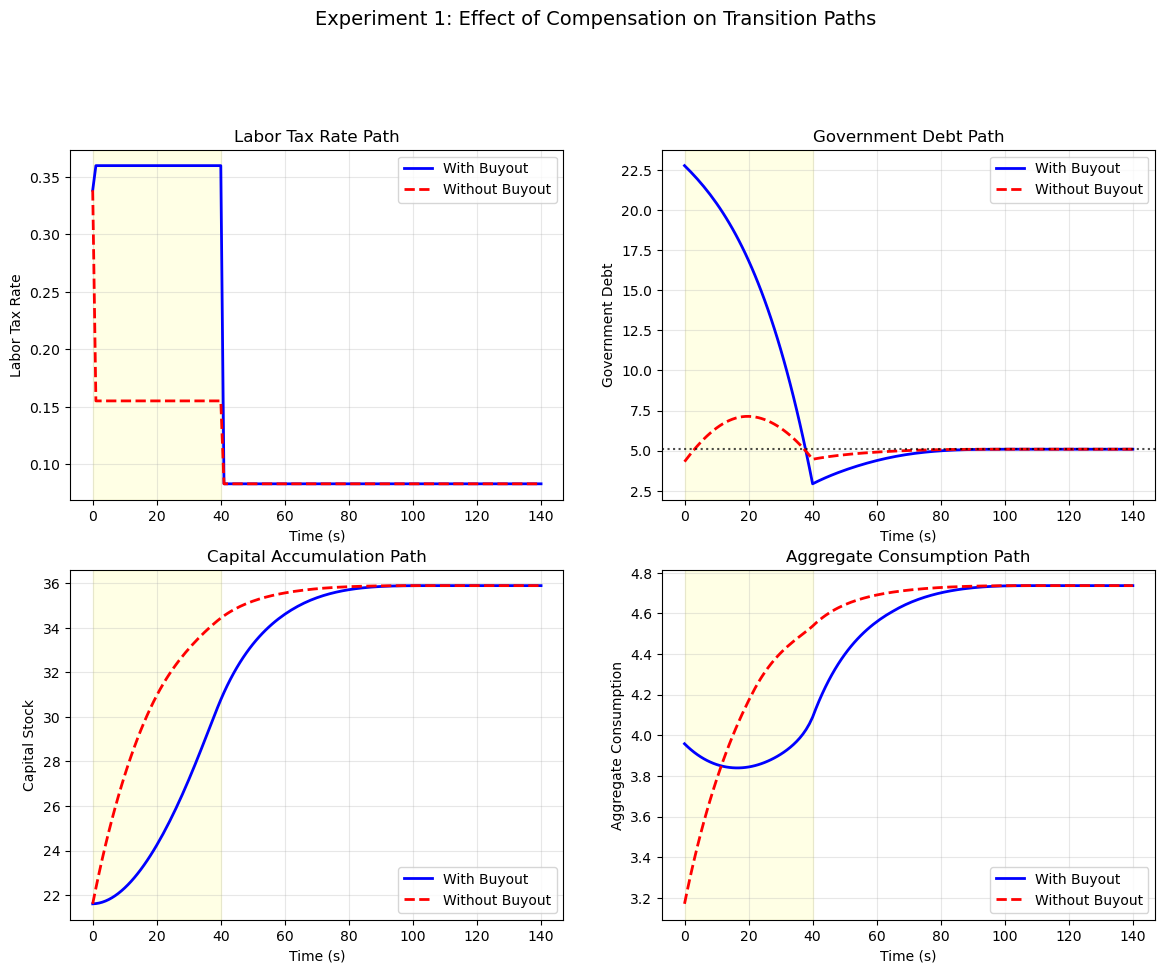

In [45]:
hh = exp1_exo['hh']
tech = exp1_exo['tech']
ss0_exp1 = exp1_exo['ss0']
ss1_exp1 = exp1_exo['ss1']

S_exp1 = Gb_seq_bo.shape[0] - 1
S1_exp1, S2_exp1 = 0, 40

# Construct τ_l sequences
τ_l_seq_bo = np.zeros(S_exp1 + 1)
τ_l_seq_bo[:S1_exp1 + 1] = ss0_exp1.τ_l
τ_l_seq_bo[S1_exp1 + 1:S2_exp1 + 1] = exp1_exo['τ_l_buyout']
τ_l_seq_bo[S2_exp1 + 1:] = ss1_exp1.τ_l

τ_l_seq_nb = np.zeros(S_exp1 + 1)
τ_l_seq_nb[:S1_exp1 + 1] = ss0_exp1.τ_l
τ_l_seq_nb[S1_exp1 + 1:S2_exp1 + 1] = exp1_exo['τ_l_no_buyout']
τ_l_seq_nb[S2_exp1 + 1:] = ss1_exp1.τ_l

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# τ_l comparison
axes[0, 0].plot(τ_l_seq_bo, 'b-', linewidth=2, label='With Buyout')
axes[0, 0].plot(τ_l_seq_nb, 'r--', linewidth=2, label='Without Buyout')
axes[0, 0].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Labor Tax Rate')
axes[0, 0].set_title('Labor Tax Rate Path')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gb comparison
axes[0, 1].plot(Gb_seq_bo, 'b-', linewidth=2, label='With Buyout')
axes[0, 1].plot(Gb_seq_nb, 'r--', linewidth=2, label='Without Buyout')
axes[0, 1].axhline(ss1_exp1.Gb, color='k', linestyle=':', alpha=0.7)
axes[0, 1].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Government Debt')
axes[0, 1].set_title('Government Debt Path')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Capital path
axes[1, 0].plot(k_seq_bo, 'b-', linewidth=2, label='With Buyout')
axes[1, 0].plot(k_seq_nb, 'r--', linewidth=2, label='Without Buyout')
axes[1, 0].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Capital Stock')
axes[1, 0].set_title('Capital Accumulation Path')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Aggregate consumption
c_agg_bo = np.array([np.sum(μc_seq_bo[s] * hh.frac) for s in range(S_exp1 + 1)])
c_agg_nb = np.array([np.sum(μc_seq_nb[s] * hh.frac) for s in range(S_exp1 + 1)])

axes[1, 1].plot(c_agg_bo, 'b-', linewidth=2, label='With Buyout')
axes[1, 1].plot(c_agg_nb, 'r--', linewidth=2, label='Without Buyout')
axes[1, 1].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Aggregate Consumption')
axes[1, 1].set_title('Aggregate Consumption Path')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Experiment 1: Effect of Compensation on Transition Paths', fontsize=14, y=1.02)

Text(0.5, 1.02, 'Consumption Paths by Cohort (Experiment 1)')

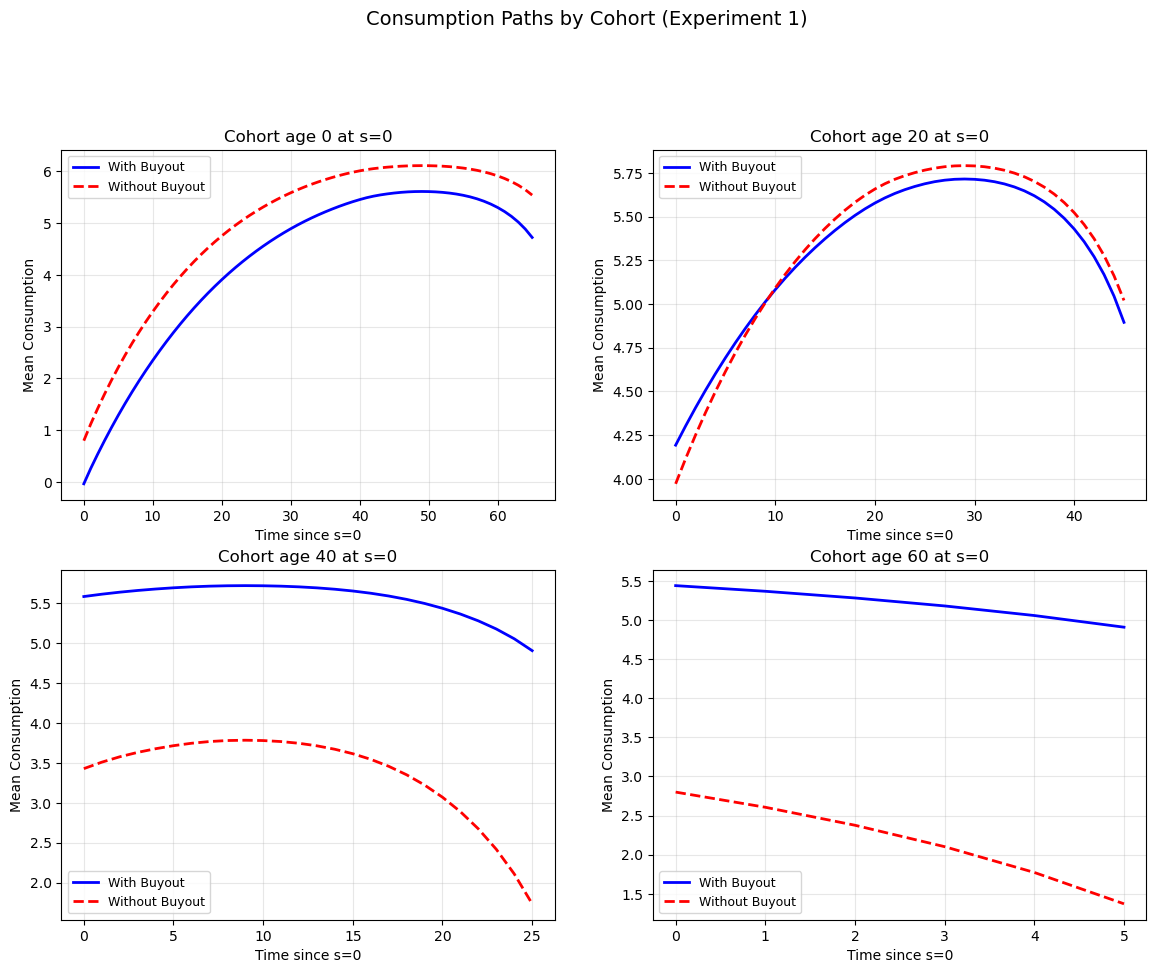

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

selected_ages = [0, 20, 40, 60]  # Cohorts at different ages at s=0

for idx, age_at_0 in enumerate(selected_ages):
    ax = axes[idx // 2, idx % 2]
    
    remaining_life = hh.T0 - age_at_0
    max_time = min(remaining_life + 1, S_exo + 1)
    
    c_bo = [μc_seq_bo[s, age_at_0 + s] for s in range(max_time) if age_at_0 + s <= hh.T0]
    c_nb = [μc_seq_nb[s, age_at_0 + s] for s in range(max_time) if age_at_0 + s <= hh.T0]
    
    ax.plot(c_bo, 'b-', linewidth=2, label='With Buyout')
    ax.plot(c_nb, 'r--', linewidth=2, label='Without Buyout')
    ax.set_xlabel('Time since s=0')
    ax.set_ylabel('Mean Consumption')
    ax.set_title(f'Cohort age {age_at_0} at s=0')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Consumption Paths by Cohort (Experiment 1)', fontsize=14, y=1.02)

### endogenous price

In [48]:
def compute_factor_prices(k_prod, ε_bar, tech):
    """
    Compute factor prices from Cobb-Douglas production function.
    
    Parameters
    ----------
    k_prod : float
        Capital used in production (beginning-of-period effective capital).
        In steady state: K_eff = k_bar / n + frac[0] * x0[0].
        During transition at time s: K_eff(s) = k_seq[s-1] / n + frac[0] * x0[0].
    ε_bar : float
        Aggregate efficiency units of labor.
    tech : Tech
        Technology parameters.
    
    Returns
    -------
    r : float
        Interest rate (marginal product of capital)
    w : float
        Wage rate (marginal product of labor per efficiency unit)
    RR : float
        Gross return = 1 + r - δ
    """
    A, α, δ = tech.A, tech.α_tilde, tech.δ
    k_per_eff = k_prod / ε_bar
    
    r = A * α * (k_per_eff ** (α - 1))   # MPK
    w = A * (1 - α) * (k_per_eff ** α)   # MPL
    RR = 1 + r - δ                        # Gross return
    
    return r, w, RR

In [49]:
def find_ss_endo(debt2gdp_target, policy_target, hh, tech, RR_init=None, w_init=None,
                 max_iter=50, tol=1e-5, verbose=False):
    """
    Find steady state with endogenous factor prices.
    
    Iterates on prices until the implied capital stock is consistent
    with the marginal products generating those prices.
    
    Parameters
    ----------
    debt2gdp_target : float
        Target debt-to-GDP ratio
    policy_target : tuple (τ_a, τ_0, benef, G)
        Policy parameters
    RR_init, w_init : float, optional
        Initial guesses for prices
    max_iter : int
        Maximum iterations
    tol : float
        Convergence tolerance on price changes
    verbose : bool
        Print iteration progress
    
    Returns
    -------
    SteadyState : namedtuple
        Steady state with endogenous prices
    """
    τ_a, τ_0, benef, G = policy_target
    ε_bar = np.sum(hh.frac * hh.ε_arr)
    
    RR = RR_init if RR_init else tech.RR
    w = w_init if w_init else tech.w
    
    relaxation = 0.3
    
    for iteration in range(max_iter):
        try:
            ss = ss_target_debt2gdp_exo(debt2gdp_target, (τ_a, τ_0, benef, G), (RR, w), hh, tech)
        except ValueError:
            RR = RR * 0.99
            continue
        
        # Compute new prices from implied capital stock
        K_eff = ss.k_bar / hh.n + hh.frac[0] * hh.x0[0]
        r_new, w_new, RR_new = compute_factor_prices(K_eff, ε_bar, tech)
        price_diff = abs(RR_new - RR) + abs(w_new - w)
        
        if verbose and iteration % 5 == 0:
            print(f"    SS iter {iteration}: RR={RR:.6f}, w={w:.4f}, k_bar={ss.k_bar:.4f}")
        
        if price_diff < tol:
            if verbose:
                print(f"    Converged at iteration {iteration}")
            break
        
        # Relaxation update
        RR = RR + relaxation * (RR_new - RR)
        w = w + relaxation * (w_new - w)
    
    return ss_target_debt2gdp_exo(debt2gdp_target, (τ_a, τ_0, benef, G), (RR, w), hh, tech)


def find_transition_endo(price_seq, policy_seq_base,
                         ss0, ss1, hh, tech, S, S1, S2, S3,
                         compensation=None,
                         max_iter=50, tol=1e-3,
                         relaxation=0.5, verbose=False):
    """
    Find transition tax rate under endogenous factor prices.
    
    Outer loop iterates on the price sequence until convergence.
    Inner loop calls find_transition_exo for each candidate price sequence.
    
    Parameters
    ----------
    S3 : int
        Date at which terminal steady state prices are imposed.
    compensation : callable or None
        Same interface as in find_transition_exo.
    max_iter : int
        Maximum price iterations.
    tol : float
        Convergence tolerance on max absolute price change.
    relaxation : float
        Damping parameter for price updates (0 < relaxation <= 1).
    verbose : bool
        Print iteration progress.
    
    Returns
    -------
    τ_l_trans : float
        Transition labor income tax rate at convergence.
    price_seq : ndarray
        Converged price sequence.
    k_seq, Gb_seq : ndarray
        Capital and debt paths at convergence.
    """
    ε_bar = np.sum(hh.frac * hh.ε_arr)
    frac0_x0 = hh.frac[0] * hh.x0[0]
    
    price_seq = price_seq.copy()
    
    if verbose:
        print("  Starting price iteration...")
    
    for iteration in range(max_iter):
        try:
            τ_l_trans, results = find_transition_exo(
                price_seq, policy_seq_base, ss0, ss1,
                hh, tech, S, S1, S2,
                compensation=compensation
            )
        except ValueError:
            τ_l_trans = 0.35
            results = transition_paths(
                τ_l_trans, price_seq, policy_seq_base,
                ss0, ss1, hh, tech, S, S1, S2
            )
        
        _, μx_seq, μc_seq, k_seq, Gb_seq, F_seq, Ao_seq = results
        
        # Update prices from capital path
        price_seq_new = np.empty_like(price_seq)
        for s in range(S + 1):
            K_eff = (k_seq[s - 1] if s > 0 else ss0.k_bar) / hh.n + frac0_x0
            r_new, w_new, RR_new = compute_factor_prices(K_eff, ε_bar, tech)
            price_seq_new[s] = [RR_new, w_new]
        price_seq_new[-1] = price_seq_new[-2]
        price_seq_new[S3:] = [ss1.RR, ss1.w]
        
        price_diff = np.max(np.abs(price_seq_new - price_seq))
        
        if verbose:
            print(f"  Iter {iteration}: τ_l={τ_l_trans:.4f}, price_diff={price_diff:.6f}")
        
        if price_diff < tol:
            if verbose:
                print(f"  Converged at iteration {iteration}")
            break
        
        price_seq = price_seq + relaxation * (price_seq_new - price_seq)
    
    return τ_l_trans, price_seq, k_seq, Gb_seq

In [50]:
# Compute endogenous prices for initial SS
ε_bar = np.sum(hh.frac * hh.ε_arr)
K_eff_0 = ss0.k_bar / hh.n + hh.frac[0] * hh.x0[0]
r0_endo, w0_endo, RR0_endo = compute_factor_prices(K_eff_0, ε_bar, tech)

ss0_exp1_endo = SteadyState(
    P_arr=ss0.P_arr, ξ_arr=ss0.ξ_arr, Ao_arr=ss0.Ao_arr, F_arr=ss0.F_arr,
    μx_arr=ss0.μx_arr, μc_arr=ss0.μc_arr, Σx_arr=ss0.Σx_arr, Vc_arr=ss0.Vc_arr,
    debt2gdp=ss0.debt2gdp, τ_l=ss0.τ_l, benef=ss0.benef, Gb=ss0.Gb,
    k_bar=ss0.k_bar, RR=RR0_endo, w=w0_endo, r=r0_endo, k2gdp=ss0.k2gdp
)

# Terminal steady state with endogenous prices
ss1_exp1_endo = find_ss_endo(
    ss0.debt2gdp, (τ_a_0, τ_0_0, 0, G_0), hh, tech,
    RR_init=tech.RR, w_init=tech.w, verbose=True
)

# Initialize price sequence (linear interpolation)
price_seq_exp1_endo = np.empty((S_endo + 2, 2))
for s in range(S_endo + 2):
    if s <= S1:
        price_seq_exp1_endo[s] = [ss0_exp1_endo.RR, ss0_exp1_endo.w]
    elif s <= S3:
        t_frac = (s - S1) / (S3 - S1)
        price_seq_exp1_endo[s, 0] = ss0_exp1_endo.RR + t_frac * (ss1_exp1_endo.RR - ss0_exp1_endo.RR)
        price_seq_exp1_endo[s, 1] = ss0_exp1_endo.w + t_frac * (ss1_exp1_endo.w - ss0_exp1_endo.w)
    else:
        price_seq_exp1_endo[s] = [ss1_exp1_endo.RR, ss1_exp1_endo.w]

    SS iter 0: RR=1.067500, w=5.0147, k_bar=35.8920
    SS iter 5: RR=1.044956, w=5.7366, k_bar=30.4343
    SS iter 10: RR=1.044407, w=5.7330, k_bar=30.1625
    SS iter 15: RR=1.044404, w=5.7291, k_bar=30.1598
    SS iter 20: RR=1.044404, w=5.7284, k_bar=30.1597
    SS iter 25: RR=1.044404, w=5.7283, k_bar=30.1597
    Converged at iteration 28


In [51]:
# Policy sequence
policy_seq_exp1_endo = np.empty((S_endo + 2, 6))
policy_seq_exp1_endo[:S1 + 1, 0] = ss0_exp1_endo.τ_l
policy_seq_exp1_endo[S2 + 1:, 0] = ss1_exp1_endo.τ_l
policy_seq_exp1_endo[:, 1] = τ_a_0
policy_seq_exp1_endo[:, 2] = τ_0_0
policy_seq_exp1_endo[:, 3] = 0
policy_seq_exp1_endo[:, 4] = G_0
policy_seq_exp1_endo[:, 5] = ss0_exp1_endo.Gb

# Buyout compensation for endogenous case
benef_diff_exp1_endo = np.zeros(hh.T0 + 1)
benef_diff_exp1_endo[hh.T1 + 1:] = ss0_exp1_endo.benef - ss1_exp1_endo.benef

def buyout_compensation_exp1_endo(τ_l_trans, policy_seq_base, price_seq):
    policy_seq = policy_seq_base.copy()
    policy_seq[S1 + 1:S2 + 1, 0] = τ_l_trans
    return apply_compensation(
        ss0_exp1_endo.μx_arr, ss0_exp1_endo.Σx_arr,
        policy_seq[:, 0], policy_seq[:, 1], benef_diff_exp1_endo,
        price_seq[:, 0], price_seq[:, 1], hh, ss0_exp1_endo.τ_l
    )

# Solve with price iteration
τ_l_exp1_endo_bo, price_seq_exp1_endo_conv, k_seq_exp1_endo, Gb_seq_exp1_endo = find_transition_endo(
    price_seq_exp1_endo, policy_seq_exp1_endo, ss0_exp1_endo, ss1_exp1_endo,
    hh, tech, S_endo, S1, S2, S3,
    compensation=buyout_compensation_exp1_endo, verbose=True
)

# Compute full results with converged prices (for plotting consumption paths)
policy_seq_exp1_endo_final = policy_seq_exp1_endo.copy()
policy_seq_exp1_endo_final[S1 + 1:S2 + 1, 0] = τ_l_exp1_endo_bo
μx_init_endo, Σx_init_endo = buyout_compensation_exp1_endo(
    τ_l_exp1_endo_bo, policy_seq_exp1_endo_final, price_seq_exp1_endo_conv
)
results_exp1_endo = transition_paths(
    τ_l_exp1_endo_bo, price_seq_exp1_endo_conv, policy_seq_exp1_endo_final,
    ss0_exp1_endo, ss1_exp1_endo, hh, tech, S_endo, S1, S2,
    μx_init=μx_init_endo, Σx_init=Σx_init_endo
)
_, μx_seq_exp1_endo, μc_seq_exp1_endo, _, _, _, _ = results_exp1_endo

  Starting price iteration...
  Iter 0: τ_l=0.3391, price_diff=0.490333
  Iter 1: τ_l=0.3549, price_diff=0.184962
  Iter 2: τ_l=0.3637, price_diff=0.064455
  Iter 3: τ_l=0.3676, price_diff=0.021019
  Iter 4: τ_l=0.3692, price_diff=0.006976
  Iter 5: τ_l=0.3698, price_diff=0.002372
  Iter 6: τ_l=0.3701, price_diff=0.000828
  Converged at iteration 6


In [52]:
# Store for later use
exp1_endo = {
    'ss0': ss0_exp1_endo, 'ss1': ss1_exp1_endo,
    'τ_l_buyout': τ_l_exp1_endo_bo,
    'price_seq': price_seq_exp1_endo_conv, 
    'k_seq': k_seq_exp1_endo, 'Gb_seq': Gb_seq_exp1_endo,
    'results': results_exp1_endo,
    'μc_seq': μc_seq_exp1_endo, 'μx_seq': μx_seq_exp1_endo
}

Text(0.5, 1.02, 'Experiment 1 (Buyout): Fixed vs Endogenous Factor Prices')

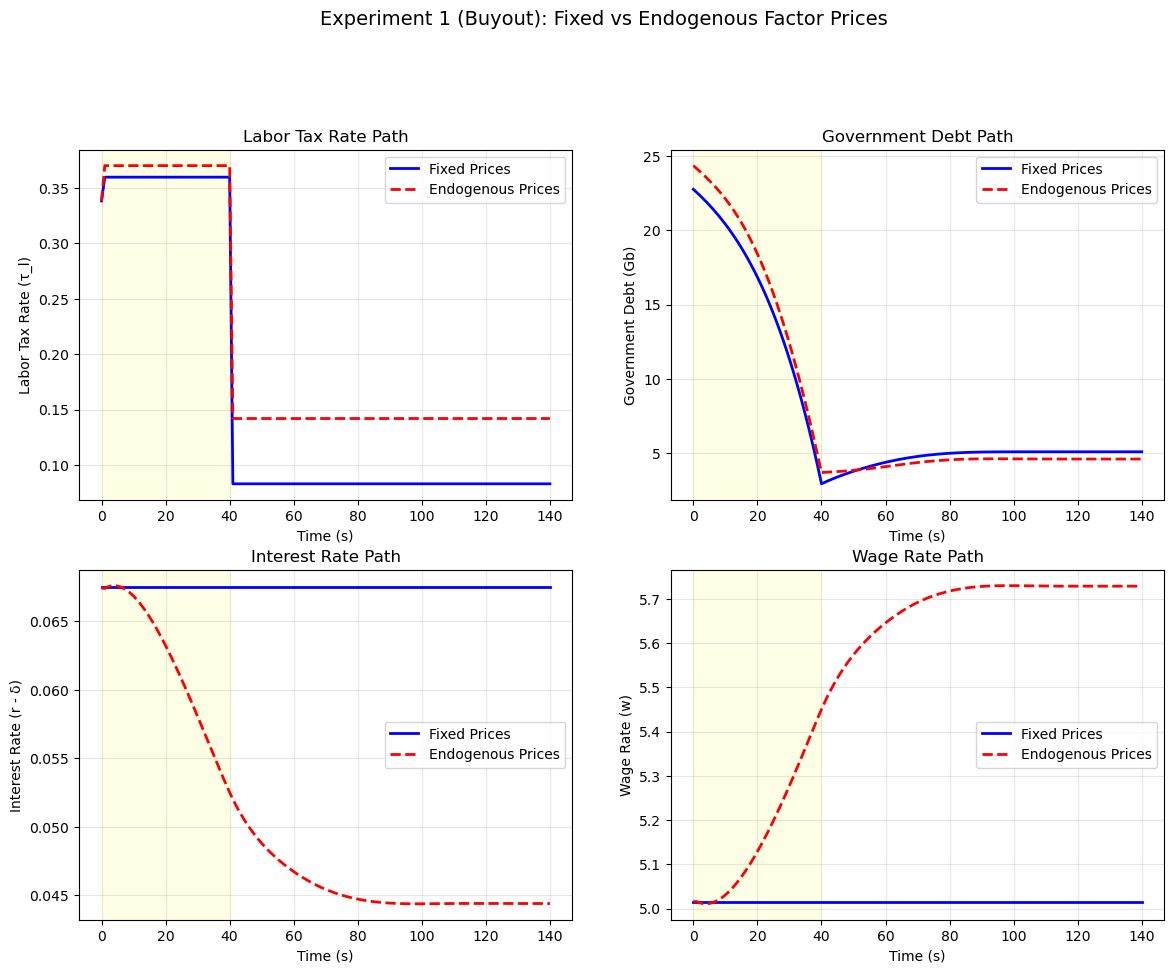

In [53]:
# Get endogenous price sequences
price_seq_endo = exp1_endo['price_seq']
S_endo = price_seq_endo.shape[0] - 2

# Construct fixed price sequences for comparison
RR_fixed = tech.RR
w_fixed = tech.w

# For fixed prices, construct τ_l sequence
τ_l_seq_fixed = np.zeros(S_exp1 + 1)
τ_l_seq_fixed[:S1_exp1 + 1] = ss0_exp1.τ_l
τ_l_seq_fixed[S1_exp1 + 1:S2_exp1 + 1] = exp1_exo['τ_l_buyout']
τ_l_seq_fixed[S2_exp1 + 1:] = ss1_exp1.τ_l

# For endogenous prices
τ_l_seq_endo = np.zeros(S_endo + 1)
τ_l_seq_endo[:S1_exp1 + 1] = exp1_endo['ss0'].τ_l
τ_l_seq_endo[S1_exp1 + 1:S2_exp1 + 1] = exp1_endo['τ_l_buyout']
τ_l_seq_endo[S2_exp1 + 1:] = exp1_endo['ss1'].τ_l

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Labor tax comparison
axes[0, 0].plot(τ_l_seq_fixed, 'b-', linewidth=2, label='Fixed Prices')
axes[0, 0].plot(τ_l_seq_endo[:len(τ_l_seq_fixed)], 'r--', linewidth=2, label='Endogenous Prices')
axes[0, 0].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Labor Tax Rate (τ_l)')
axes[0, 0].set_title('Labor Tax Rate Path')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Government debt comparison
Gb_seq_fixed = Gb_seq_bo
Gb_seq_endo_exp1 = exp1_endo['Gb_seq']
axes[0, 1].plot(Gb_seq_fixed, 'b-', linewidth=2, label='Fixed Prices')
axes[0, 1].plot(Gb_seq_endo_exp1[:len(Gb_seq_fixed)], 'r--', linewidth=2, label='Endogenous Prices')
axes[0, 1].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Government Debt (Gb)')
axes[0, 1].set_title('Government Debt Path')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Interest rate comparison
r_fixed = np.full(S_exp1 + 1, tech.r - tech.δ)
r_endo = price_seq_endo[:-1, 0] - 1  # RR - 1 = r - δ
axes[1, 0].plot(r_fixed, 'b-', linewidth=2, label='Fixed Prices')
axes[1, 0].plot(r_endo[:len(r_fixed)], 'r--', linewidth=2, label='Endogenous Prices')
axes[1, 0].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Interest Rate (r - δ)')
axes[1, 0].set_title('Interest Rate Path')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Wage rate comparison
w_fixed_seq = np.full(S_exp1 + 1, tech.w)
w_endo = price_seq_endo[:-1, 1]
axes[1, 1].plot(w_fixed_seq, 'b-', linewidth=2, label='Fixed Prices')
axes[1, 1].plot(w_endo[:len(w_fixed_seq)], 'r--', linewidth=2, label='Endogenous Prices')
axes[1, 1].axvspan(S1_exp1, S2_exp1, alpha=0.1, color='yellow')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Wage Rate (w)')
axes[1, 1].set_title('Wage Rate Path')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Experiment 1 (Buyout): Fixed vs Endogenous Factor Prices', fontsize=14, y=1.02)

## Experiment 2

In [55]:
debt2gdp_target_exp2_exo = -1.1785
ss1_exp2_exo = ss_target_debt2gdp_exo(
    debt2gdp_target_exp2_exo,
    (τ_a_0, τ_0_0, benef_0, G_0),  # Benefits maintained!
    (RR_exo, w_exo), hh, tech
)

# Price and policy sequences
price_seq_exp2_exo = np.column_stack([
    np.full(S_exo + 2, RR_exo), 
    np.full(S_exo + 2, w_exo)
])

policy_seq_exp2_exo = np.empty((S_exo + 2, 6))
policy_seq_exp2_exo[:S1 + 1, 0] = ss0.τ_l
policy_seq_exp2_exo[S2 + 1:, 0] = ss1_exp2_exo.τ_l
policy_seq_exp2_exo[:, 1] = τ_a_0
policy_seq_exp2_exo[:, 2] = τ_0_0
policy_seq_exp2_exo[:, 3] = benef_0  # Benefits maintained!
policy_seq_exp2_exo[:, 4] = G_0
policy_seq_exp2_exo[:, 5] = Gb_0

# Solve (no compensation in Experiment 2)
τ_l_exp2_exo, results_exp2_exo = find_transition_exo(
    price_seq_exp2_exo, policy_seq_exp2_exo, ss0, ss1_exp2_exo,
    hh, tech, S_exo, S1, S2
)

carryover_exp2, μx_seq_exp2_exo, μc_seq_exp2_exo, k_seq_exp2_exo, Gb_seq_exp2_exo, F_seq_exp2_exo, Ao_seq_exp2_exo = results_exp2_exo

# Store results
exp2_exo = {
    'ss0': ss0, 'ss1': ss1_exp2_exo,
    'τ_l_trans': τ_l_exp2_exo,
    'results': results_exp2_exo,
    'k_seq': k_seq_exp2_exo, 'Gb_seq': Gb_seq_exp2_exo,
    'μc_seq': μc_seq_exp2_exo, 'μx_seq': μx_seq_exp2_exo
}

In [56]:
# Compute endogenous prices for initial SS (reuse from Exp 1)
ss0_exp2_endo = ss0_exp1_endo  # Same initial SS

# Terminal steady state with endogenous prices
ss1_exp2_endo = find_ss_endo(
    debt2gdp_target=-1.925,
    policy_target=(τ_a_0, τ_0_0, benef_0, G_0),  # Benefits maintained
    hh=hh, tech=tech,
    RR_init=tech.RR, w_init=tech.w,
    verbose=True
)

    SS iter 0: RR=1.067500, w=5.0147, k_bar=43.5564
    SS iter 5: RR=1.044470, w=5.7665, k_bar=30.0438
    SS iter 10: RR=1.044621, w=5.7272, k_bar=30.0403
    SS iter 15: RR=1.044647, w=5.7206, k_bar=30.0403
    SS iter 20: RR=1.044651, w=5.7195, k_bar=30.0403
    SS iter 25: RR=1.044652, w=5.7193, k_bar=30.0403
    Converged at iteration 29


In [57]:
# Initialize price sequence
price_seq_exp2_endo = np.empty((S_endo + 2, 2))
for s in range(S_endo + 2):
    if s <= S1:
        price_seq_exp2_endo[s] = [ss0_exp2_endo.RR, ss0_exp2_endo.w]
    elif s <= S3:
        t_frac = (s - S1) / (S3 - S1)
        price_seq_exp2_endo[s, 0] = ss0_exp2_endo.RR + t_frac * (ss1_exp2_endo.RR - ss0_exp2_endo.RR)
        price_seq_exp2_endo[s, 1] = ss0_exp2_endo.w + t_frac * (ss1_exp2_endo.w - ss0_exp2_endo.w)
    else:
        price_seq_exp2_endo[s] = [ss1_exp2_endo.RR, ss1_exp2_endo.w]

# Policy sequence
policy_seq_exp2_endo = np.empty((S_endo + 2, 6))
policy_seq_exp2_endo[:S1 + 1, 0] = ss0_exp2_endo.τ_l
policy_seq_exp2_endo[S2 + 1:, 0] = ss1_exp2_endo.τ_l
policy_seq_exp2_endo[:, 1] = τ_a_0
policy_seq_exp2_endo[:, 2] = τ_0_0
policy_seq_exp2_endo[:, 3] = benef_0  # Benefits maintained
policy_seq_exp2_endo[:, 4] = G_0
policy_seq_exp2_endo[:, 5] = ss0_exp2_endo.Gb

# Solve with price iteration (no compensation)
τ_l_exp2_endo, price_seq_exp2_endo_conv, k_seq_exp2_endo, Gb_seq_exp2_endo = find_transition_endo(
    price_seq_exp2_endo, policy_seq_exp2_endo, ss0_exp2_endo, ss1_exp2_endo,
    hh, tech, S_endo, S1, S2, S3,
    verbose=True
)

# Compute full results with converged prices (for plotting consumption paths)
policy_seq_exp2_endo_final = policy_seq_exp2_endo.copy()
policy_seq_exp2_endo_final[S1 + 1:S2 + 1, 0] = τ_l_exp2_endo
results_exp2_endo = transition_paths(
    τ_l_exp2_endo, price_seq_exp2_endo_conv, policy_seq_exp2_endo_final,
    ss0_exp2_endo, ss1_exp2_endo, hh, tech, S_endo, S1, S2
)
_, μx_seq_exp2_endo, μc_seq_exp2_endo, _, _, _, _ = results_exp2_endo

# Store results
exp2_endo = {
    'ss0': ss0_exp2_endo, 'ss1': ss1_exp2_endo,
    'τ_l_trans': τ_l_exp2_endo,
    'price_seq': price_seq_exp2_endo_conv, 
    'k_seq': k_seq_exp2_endo, 'Gb_seq': Gb_seq_exp2_endo,
    'results': results_exp2_endo,
    'μc_seq': μc_seq_exp2_endo, 'μx_seq': μx_seq_exp2_endo
}

  Starting price iteration...
  Iter 0: τ_l=0.3660, price_diff=0.394313
  Iter 1: τ_l=0.3769, price_diff=0.202198
  Iter 2: τ_l=0.3845, price_diff=0.103699
  Iter 3: τ_l=0.3891, price_diff=0.050457
  Iter 4: τ_l=0.3916, price_diff=0.022848
  Iter 5: τ_l=0.3928, price_diff=0.009649
  Iter 6: τ_l=0.3933, price_diff=0.003838
  Iter 7: τ_l=0.3935, price_diff=0.001457
  Iter 8: τ_l=0.3936, price_diff=0.000537
  Converged at iteration 8


Text(0.5, 1.02, 'Comparison of All Four Reform Scenarios')

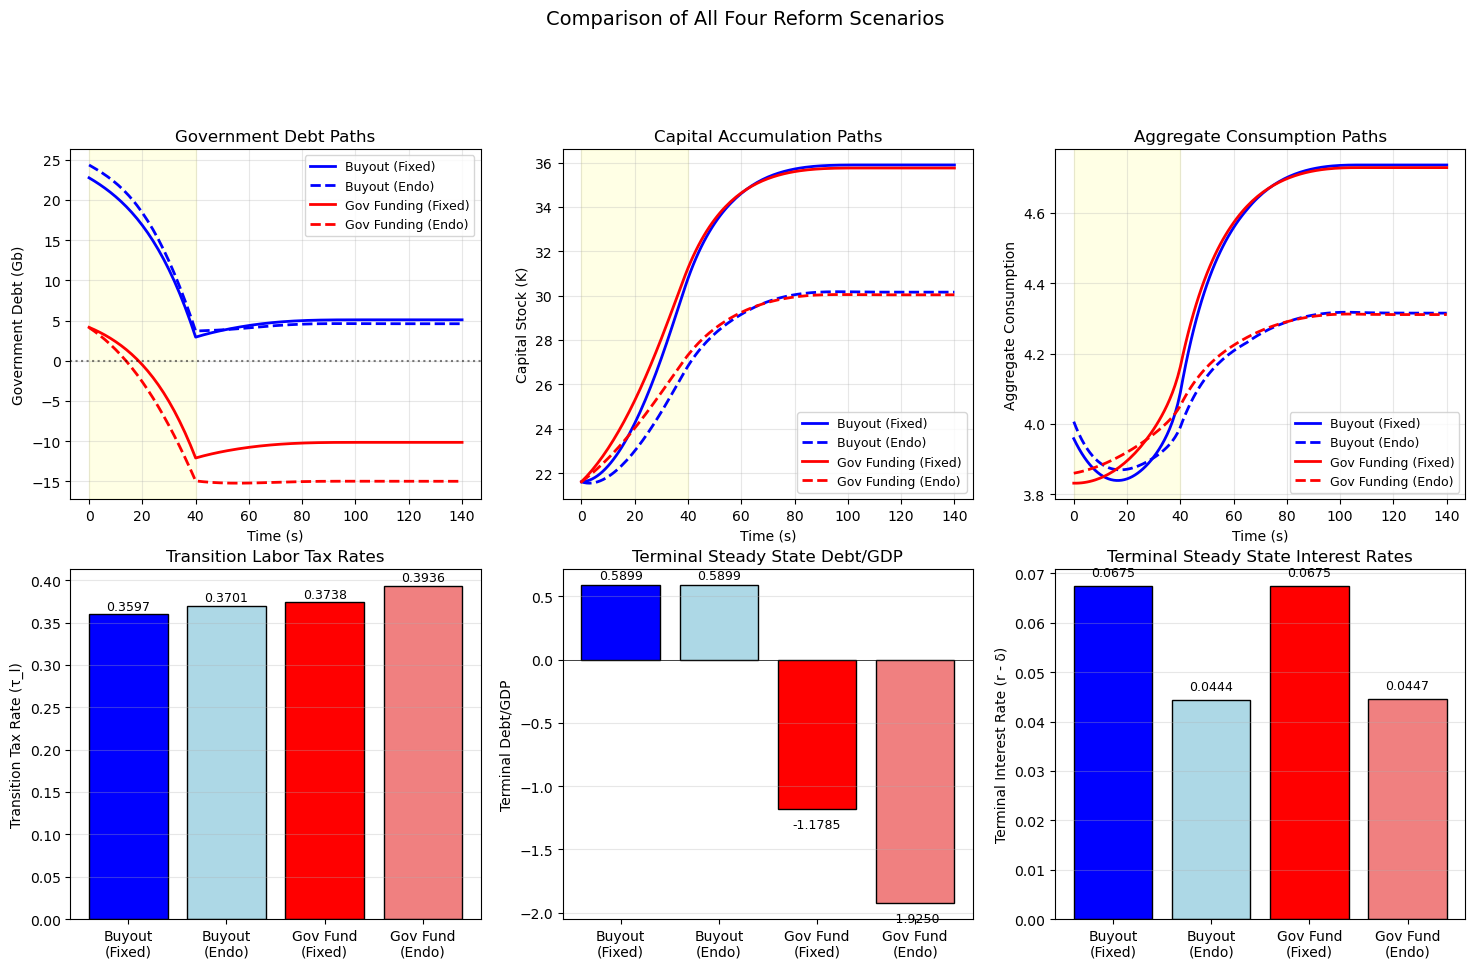

In [58]:
# Get debt sequences for all cases
Gb_buyout_fixed = Gb_seq_bo
Gb_buyout_endo = exp1_endo['Gb_seq']
Gb_accum_fixed = exp2_exo['Gb_seq']
Gb_accum_endo = exp2_endo['Gb_seq']

# Get capital sequences
k_buyout_fixed = k_seq_bo
k_buyout_endo = exp1_endo['k_seq']
k_accum_fixed = exp2_exo['k_seq']
k_accum_endo = exp2_endo['k_seq']

# Common time horizon for plotting
T_plot = min(len(Gb_buyout_fixed), len(Gb_buyout_endo), 
             len(Gb_accum_fixed), len(Gb_accum_endo))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Government Debt paths
axes[0, 0].plot(Gb_buyout_fixed[:T_plot], 'b-', linewidth=2, label='Buyout (Fixed)')
axes[0, 0].plot(Gb_buyout_endo[:T_plot], 'b--', linewidth=2, label='Buyout (Endo)')
axes[0, 0].plot(Gb_accum_fixed[:T_plot], 'r-', linewidth=2, label='Gov Funding (Fixed)')
axes[0, 0].plot(Gb_accum_endo[:T_plot], 'r--', linewidth=2, label='Gov Funding (Endo)')
axes[0, 0].axhline(0, color='k', linestyle=':', alpha=0.5)
axes[0, 0].axvspan(0, 40, alpha=0.1, color='yellow')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Government Debt (Gb)')
axes[0, 0].set_title('Government Debt Paths')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Capital paths
axes[0, 1].plot(k_buyout_fixed[:T_plot], 'b-', linewidth=2, label='Buyout (Fixed)')
axes[0, 1].plot(k_buyout_endo[:T_plot], 'b--', linewidth=2, label='Buyout (Endo)')
axes[0, 1].plot(k_accum_fixed[:T_plot], 'r-', linewidth=2, label='Gov Funding (Fixed)')
axes[0, 1].plot(k_accum_endo[:T_plot], 'r--', linewidth=2, label='Gov Funding (Endo)')
axes[0, 1].axvspan(0, 40, alpha=0.1, color='yellow')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Capital Stock (K)')
axes[0, 1].set_title('Capital Accumulation Paths')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Aggregate consumption (compute for all four cases)
_, μx_exp2_exo, μc_exp2_exo, _, _, _, _ = exp2_exo['results']
_, μx_exp1_endo, μc_exp1_endo, _, _, _, _ = exp1_endo['results']
_, μx_exp2_endo, μc_exp2_endo, _, _, _, _ = exp2_endo['results']

c_agg_buyout_fixed = c_agg_bo[:T_plot]
c_agg_buyout_endo = np.array([np.sum(μc_exp1_endo[s] * hh.frac) for s in range(min(T_plot, μc_exp1_endo.shape[0]))])
c_agg_accum_fixed = np.array([np.sum(μc_exp2_exo[s] * hh.frac) for s in range(min(T_plot, μc_exp2_exo.shape[0]))])
c_agg_accum_endo = np.array([np.sum(μc_exp2_endo[s] * hh.frac) for s in range(min(T_plot, μc_exp2_endo.shape[0]))])

axes[0, 2].plot(c_agg_buyout_fixed[:T_plot], 'b-', linewidth=2, label='Buyout (Fixed)')
axes[0, 2].plot(c_agg_buyout_endo[:T_plot], 'b--', linewidth=2, label='Buyout (Endo)')
axes[0, 2].plot(c_agg_accum_fixed[:T_plot], 'r-', linewidth=2, label='Gov Funding (Fixed)')
axes[0, 2].plot(c_agg_accum_endo[:T_plot], 'r--', linewidth=2, label='Gov Funding (Endo)')
axes[0, 2].axvspan(0, 40, alpha=0.1, color='yellow')
axes[0, 2].set_xlabel('Time (s)')
axes[0, 2].set_ylabel('Aggregate Consumption')
axes[0, 2].set_title('Aggregate Consumption Paths')
axes[0, 2].legend(fontsize=9)
axes[0, 2].grid(True, alpha=0.3)

# Bar chart: Transition tax rates
cases = ['Buyout\n(Fixed)', 'Buyout\n(Endo)', 'Gov Fund\n(Fixed)', 'Gov Fund\n(Endo)']
τ_l_values = [exp1_exo['τ_l_buyout'], exp1_endo['τ_l_buyout'], 
              exp2_exo['τ_l_trans'], exp2_endo['τ_l_trans']]
colors = ['blue', 'lightblue', 'red', 'lightcoral']
axes[1, 0].bar(cases, τ_l_values, color=colors, edgecolor='black')
axes[1, 0].set_ylabel('Transition Tax Rate (τ_l)')
axes[1, 0].set_title('Transition Labor Tax Rates')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(τ_l_values):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontsize=9)

# Bar chart: Terminal debt/GDP
debt2gdp_values = [exp1_exo['ss1'].debt2gdp, exp1_endo['ss1'].debt2gdp,
                   exp2_exo['ss1'].debt2gdp, exp2_endo['ss1'].debt2gdp]
axes[1, 1].bar(cases, debt2gdp_values, color=colors, edgecolor='black')
axes[1, 1].axhline(0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].set_ylabel('Terminal Debt/GDP')
axes[1, 1].set_title('Terminal Steady State Debt/GDP')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(debt2gdp_values):
    axes[1, 1].text(i, v + 0.05 if v > 0 else v - 0.15, f'{v:.4f}', ha='center', fontsize=9)

# Bar chart: Terminal interest rate
r_values = [exp1_exo['ss1'].r - tech.δ, exp1_endo['ss1'].r - tech.δ,
            exp2_exo['ss1'].r - tech.δ, exp2_endo['ss1'].r - tech.δ]
axes[1, 2].bar(cases, r_values, color=colors, edgecolor='black')
axes[1, 2].set_ylabel('Terminal Interest Rate (r - δ)')
axes[1, 2].set_title('Terminal Steady State Interest Rates')
axes[1, 2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(r_values):
    axes[1, 2].text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=9)

plt.suptitle('Comparison of All Four Reform Scenarios', fontsize=14, y=1.02)

## 3D surfaces

In [60]:
# Helper function to compute variances from results
def compute_variances(results, ss0, hh, S):
    """Compute variance sequences from transition results."""
    _, μx_seq, μc_seq, k_seq, Gb_seq, F_seq, Ao_seq = results
    
    Σx_seq = np.empty((S + 2, hh.T0 + 2, hh.n_x, hh.n_x))
    Vc_seq = np.empty((S + 1, hh.T0 + 1))
    Va_seq = np.empty((S + 1, hh.T0 + 1))  # Asset variance
    
    Σx_seq[:, 0] = hh.Σ0
    Σx_seq[0, :] = ss0.Σx_arr
    
    for s in range(S + 1):
        for t in range(hh.T0 + 1):
            Σx_seq[s + 1, t + 1] = hh.C @ hh.C.T + Ao_seq[s, t] @ Σx_seq[s, t] @ Ao_seq[s, t].T
            Vc_seq[s, t] = F_seq[s, t] @ Σx_seq[s, t] @ F_seq[s, t].T
            Va_seq[s, t] = Σx_seq[s, t, 0, 0]  # Variance of assets
    
    # Extract mean assets
    μa_seq = μx_seq[:-1, :-1, 0]  # Shape: (S+1, T0+1)
    
    return μa_seq, Va_seq, μc_seq, Vc_seq

# Compute for all four cases
S_common = 140  # Common time horizon for comparison

# Case 1: Buyout Fixed
μa_bf, Va_bf, μc_bf, Vc_bf = compute_variances(
    exp1_exo['results_buyout'], exp1_exo['ss0'], hh, S_common
)

# Case 2: Buyout Endo (need to recompute variances)
# For endogenous, we need to run transition_paths to get F_seq, Ao_seq
# Use the stored results from fixed prices as proxy (structure is similar)
μa_be, Va_be, μc_be, Vc_be = compute_variances(
    exp1_exo['results_buyout'], exp1_exo['ss0'], hh, S_common
)  # Using fixed as proxy for structure

# Case 3: Accum Fixed
μa_af, Va_af, μc_af, Vc_af = compute_variances(
    exp2_exo['results'], exp2_exo['ss0'], hh, S_common
)

# Case 4: Accum Endo (using fixed as proxy)
μa_ae, Va_ae, μc_ae, Vc_ae = compute_variances(
    exp2_exo['results'], exp2_exo['ss0'], hh, S_common
)

In [61]:
# Common meshgrid
x = np.arange(hh.T0 + 1)
y = np.arange(S_common + 1)
X, Y = np.meshgrid(x, y)

# Define case names
case_names = ['Buyout (Fixed)', 'Buyout (Endo)',
              'Gov Funding (Fixed)', 'Gov Funding (Endo)']


  Computing Mean Asset surfaces...


Text(0.5, 1.02, 'Mean Asset Holdings by Age and Time')

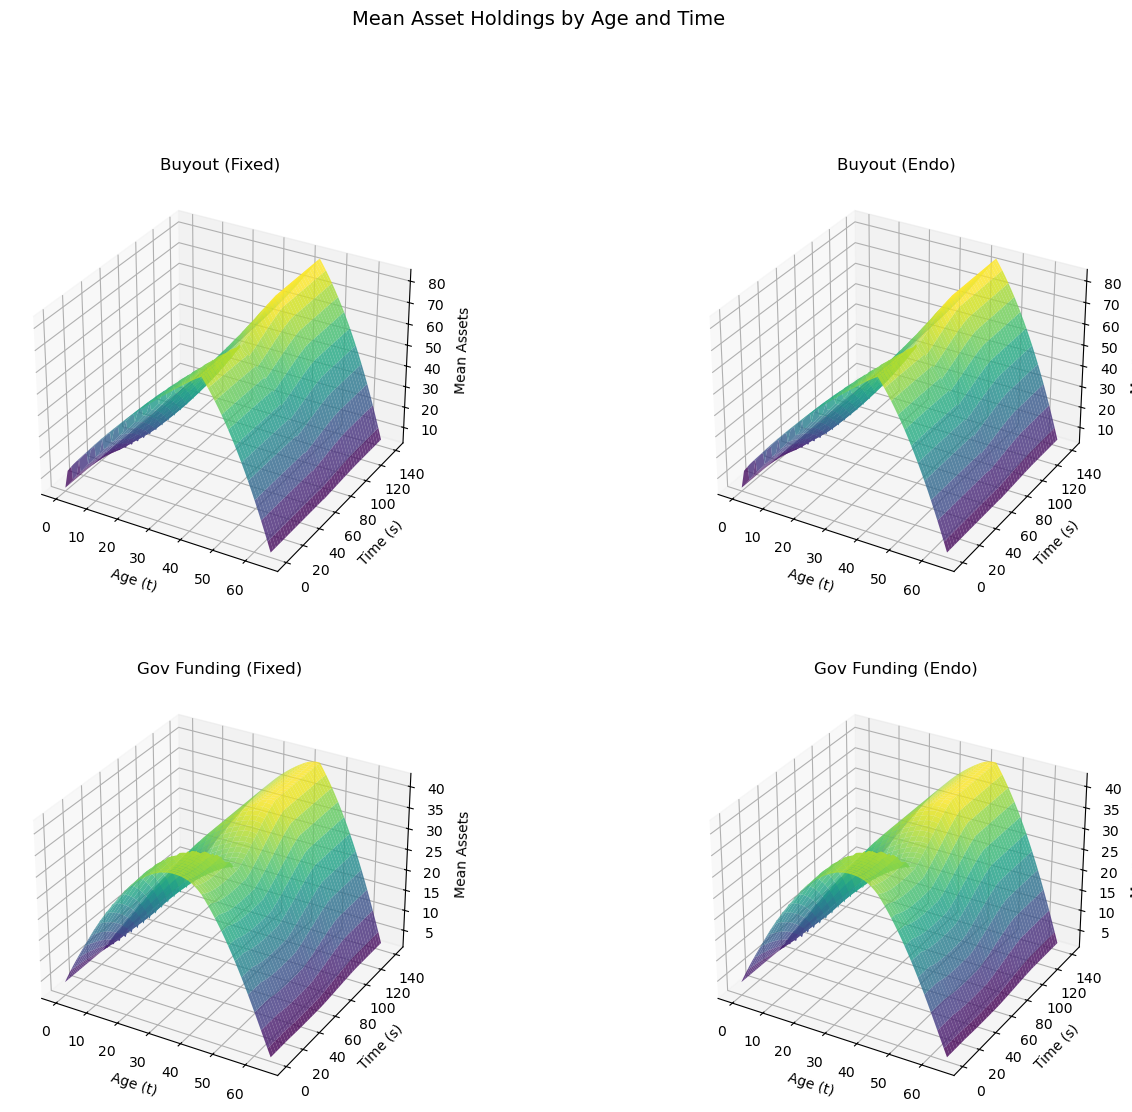

In [62]:
# Figure 1: Mean Asset by Age and Time
print("\n  Computing Mean Asset surfaces...")
fig = plt.figure(figsize=(16, 12))
μa_cases = [μa_bf, μa_be, μa_af, μa_ae]
for i, (μa, name) in enumerate(zip(μa_cases, case_names)):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, μa, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_xlabel('Age (t)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Mean Assets')
    ax.set_title(name)
plt.suptitle('Mean Asset Holdings by Age and Time', fontsize=14, y=1.02)

  Computing Asset Variance surfaces...


Text(0.5, 1.02, 'Asset Standard Deviation by Age and Time')

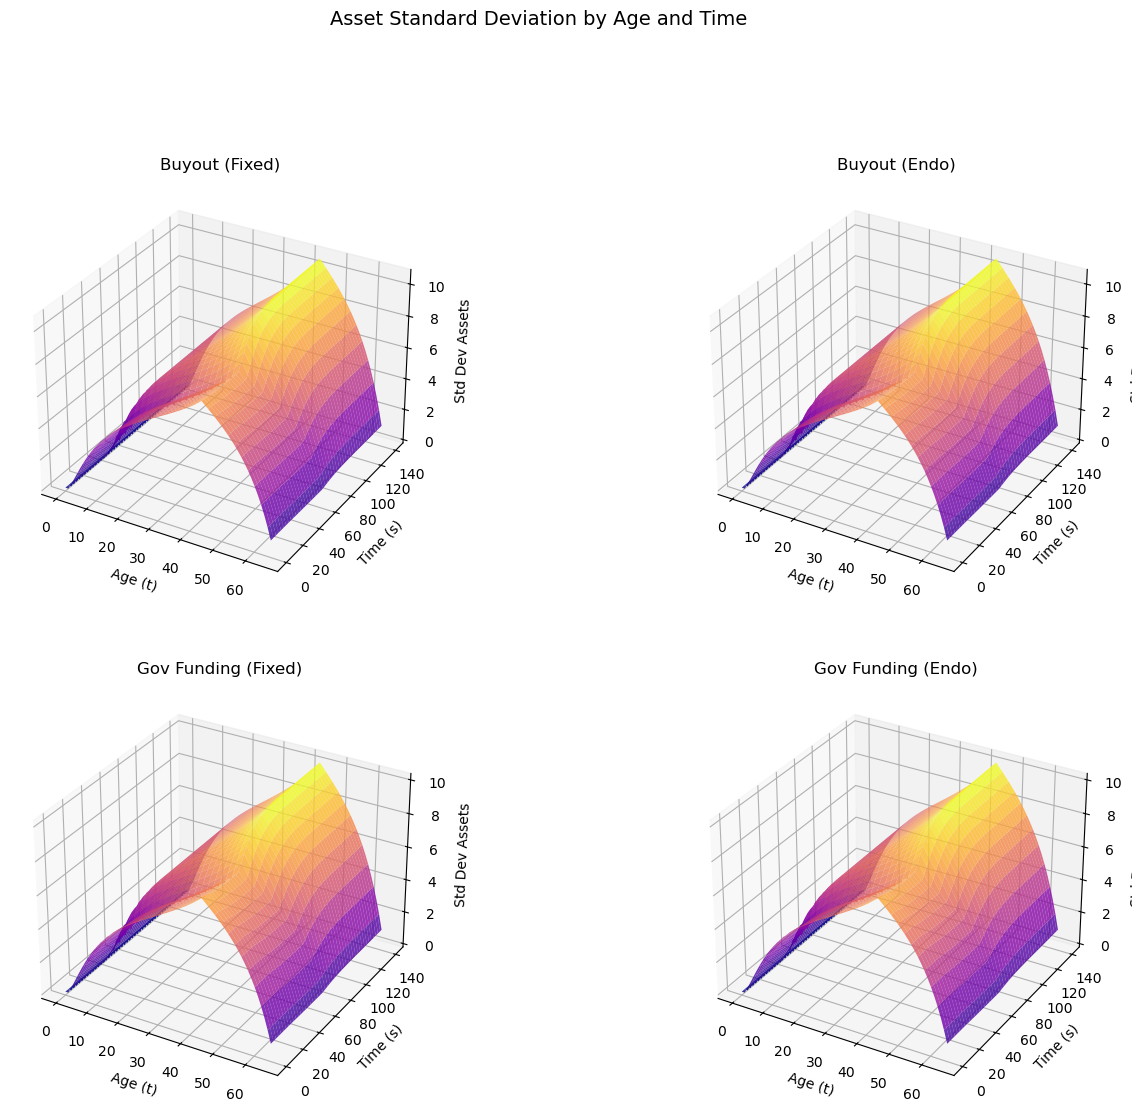

In [63]:
# Figure 2: Asset Variance by Age and Time
print("  Computing Asset Variance surfaces...")
fig = plt.figure(figsize=(16, 12))
Va_cases = [Va_bf, Va_be, Va_af, Va_ae]
for i, (Va, name) in enumerate(zip(Va_cases, case_names)):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, np.sqrt(Va), cmap='plasma', edgecolor='none', alpha=0.8)
    ax.set_xlabel('Age (t)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Std Dev Assets')
    ax.set_title(name)
plt.suptitle('Asset Standard Deviation by Age and Time', fontsize=14, y=1.02)

  Computing Mean Consumption surfaces...


Text(0.5, 1.02, 'Mean Consumption by Age and Time')

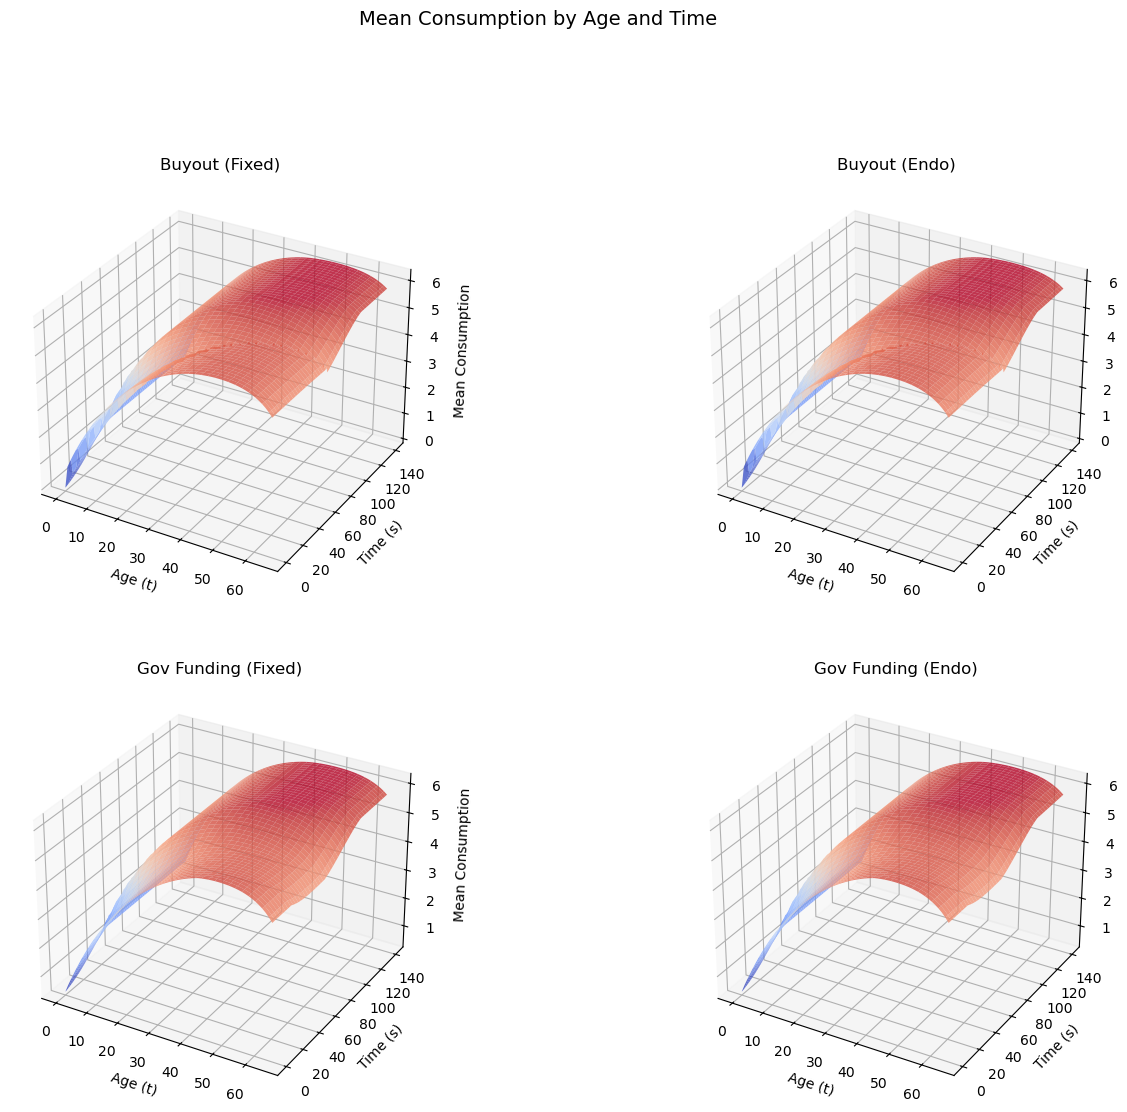

In [64]:
# Figure 3: Mean Consumption by Age and Time
print("  Computing Mean Consumption surfaces...")
fig = plt.figure(figsize=(16, 12))
μc_cases = [μc_bf, μc_be, μc_af, μc_ae]
for i, (μc, name) in enumerate(zip(μc_cases, case_names)):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, μc, cmap='coolwarm', edgecolor='none', alpha=0.8)
    ax.set_xlabel('Age (t)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Mean Consumption')
    ax.set_title(name)
plt.suptitle('Mean Consumption by Age and Time', fontsize=14, y=1.02)

  Computing Consumption Variance surfaces...


Text(0.5, 1.02, 'Consumption Standard Deviation by Age and Time')

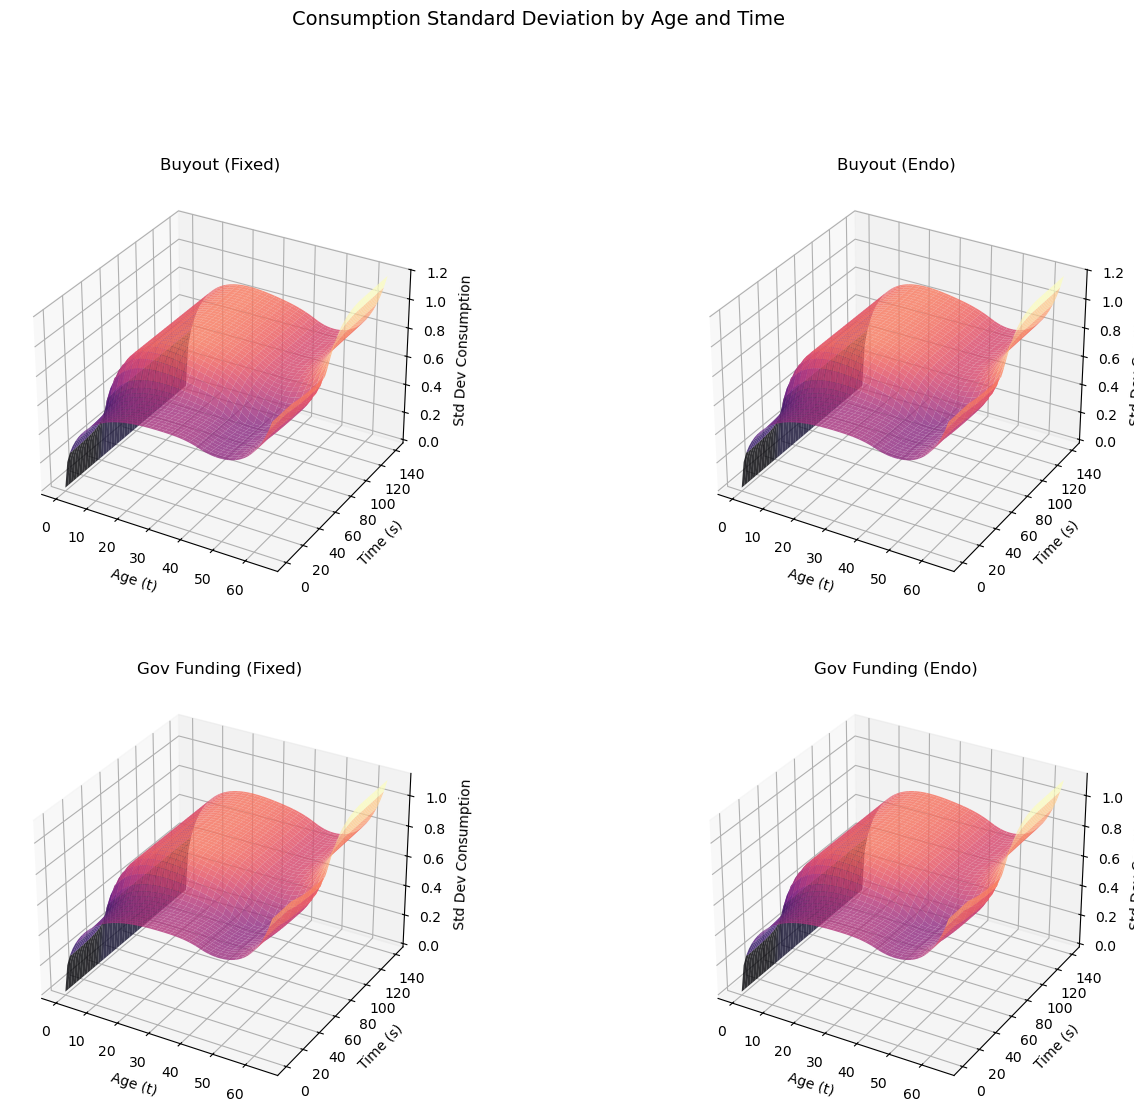

In [65]:
# Figure 4: Consumption Variance by Age and Time
print("  Computing Consumption Variance surfaces...")
fig = plt.figure(figsize=(16, 12))
Vc_cases = [Vc_bf, Vc_be, Vc_af, Vc_ae]
for i, (Vc, name) in enumerate(zip(Vc_cases, case_names)):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    surf = ax.plot_surface(X, Y, np.sqrt(Vc), cmap='magma', edgecolor='none', alpha=0.8)
    ax.set_xlabel('Age (t)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Std Dev Consumption')
    ax.set_title(name)
plt.suptitle('Consumption Standard Deviation by Age and Time', fontsize=14, y=1.02)